# CS-370 Final Project Code
### Sophia Rabbanian, Jerrick Little, Peyton Swan, Farley Dugan

# Loading in Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [ ]:
spreads = pd.read_csv('spreadspoke_scores.csv')
players = pd.read_csv('yearly_player_data.csv')
teams = pd.read_csv('yearly_team_data.csv')

In [ ]:
#spreads.info()
#players.info()
#teams.info()

In [ ]:
players = players[['team', 'player_id', "player_name", 'position', 'season', 'depth', 'pass_attempts', 'complete_pass', 'incomplete_pass', 'passing_yards', 'passing_air_yards', 'pass_td', 'interception', 'targets', 'receptions', 'receiving_yards' , 'yards_after_catch',  'reception_td', 'rush_attempts', 'rushing_yards', 'run_td', 'fantasy_points_ppr', 'comp_pct', 'ypa', 'yptarget', 'ypr', 'touches', 'total_tds', 'total_yards', 'yptouch', 'games', 'pass_ypg', 'rec_ypg', 'rush_ypg', 'ypg', 'ppg', 'passer_rating', 'game_type', 'team_total_snaps', 'team_yards_gained', 'team_pass_snaps_count', 'team_pass_snaps_pct', 'team_targets', 'team_receptions', 'team_rush_snaps_count', 'team_rush_snaps_pct', 'team_rushing_yards', 'team_run_td', 'offense_snaps' , 'draft_year', 'draft_round', 'draft_ovr', 'height', 'weight', 'college', 'age', 'wins', 'losses', 'win_pct', 'seasons_played', 'career_pass_attempts', 'career_complete_pass', 'career_passing_yards', 'average_passing_yards', 'career_passing_air_yards', 'career_pass_td', 'career_interception', 'career_targets', 'average_targets', 'career_receptions', 'average_receptions', 'career_receiving_yards' , 'average_receiving_yards' , 'career_reception_td', 'average_reception_td', 'career_rush_attempts', 'average_rush_attempts', 'career_rushing_yards', 'average_rushing_yards', 'career_run_td', 'average_run_td', 'career_fantasy_points_ppr', 'average_fantasy_points_ppr', 'career_touches', 'average_touches', 'career_total_tds', 'average_total_tds', 'career_total_yards', 'average_total_yards', 'average_games', 'career_games', 'average_ypr', 'average_pass_ypg', 'average_rec_ypg', 'average_rush_ypg' , 'average_ypg']]

In [ ]:
teams = teams[['team', 'season', 'total_snaps', 'yards_gained', 'touchdown', 'extra_point_attempt', 'field_goal_attempt', 'total_points', 'td_points', 'xp_points', 'fg_points', 'fumble', 'fumble_lost', 'pass_snaps_count', 'pass_snaps_pct', 'pass_attempts', 'complete_pass', 'passing_yards', 'pass_td', 'interception', 'rush_snaps_count', 'rush_snaps_pct', 'rushing_yards', 'run_td', 'home_wins', 'home_losses', 'home_ties', 'away_wins', 'away_losses', 'away_ties', 'wins', 'losses', 'ties', 'win_pct']]

# Exploring the Data

In [ ]:
spreads = spreads[spreads['schedule_season'] >= 2012]
spreads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3544 entries, 10542 to 14085
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        3544 non-null   object 
 1   schedule_season      3544 non-null   int64  
 2   schedule_week        3544 non-null   object 
 3   schedule_playoff     3544 non-null   bool   
 4   team_home            3544 non-null   object 
 5   score_home           3544 non-null   int64  
 6   score_away           3544 non-null   int64  
 7   team_away            3544 non-null   object 
 8   team_favorite_id     3544 non-null   object 
 9   spread_favorite      3544 non-null   float64
 10  over_under_line      3544 non-null   object 
 11  stadium              3544 non-null   object 
 12  stadium_neutral      3544 non-null   bool   
 13  weather_temperature  2502 non-null   float64
 14  weather_wind_mph     2501 non-null   float64
 15  weather_humidity     466 non-null    f

In [ ]:
spreads.value_counts('schedule_season')

,count
schedule_season,
2023,285
2024,285
2021,285
2022,284
2020,269
2016,267
2015,267
2014,267
2013,267


In [ ]:
spreads.isna().sum()

,0
schedule_date,0
schedule_season,0
schedule_week,0
schedule_playoff,0
team_home,0
score_home,0
score_away,0
team_away,0
team_favorite_id,0
spread_favorite,0


In [ ]:
spreads.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,3544.000000,3544.000000,3544.000000,3544.000000,2502.000000,2501.000000,466.000000
mean,2018.091422,23.884312,21.822235,-5.226157,63.436051,4.270692,60.568670
std,3.760558,10.217181,9.800724,3.397006,15.326713,4.805819,19.479258
min,2012.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,0.000000
25%,2015.000000,17.000000,15.000000,-7.000000,55.000000,0.000000,47.000000
50%,2018.000000,24.000000,21.000000,-4.000000,72.000000,3.000000,59.000000
75%,2021.000000,30.000000,28.000000,-3.000000,72.000000,7.000000,75.000000
max,2024.000000,70.000000,59.000000,0.000000,97.000000,33.000000,100.000000


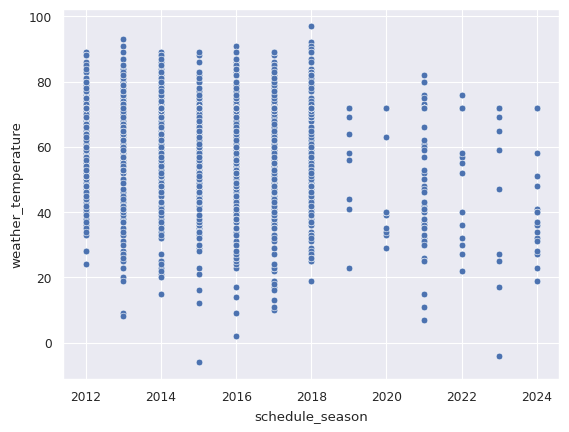

In [ ]:
sns.scatterplot(spreads, x = 'schedule_season', y = 'weather_temperature')
plt.show()
#could we use a heat map here?

In [ ]:
'''spreads.groupby('schedule_season')['weather_temperature'].count().sort_index(ascending= False)'''
print(players.position.value_counts())

position
WR    2171
RB    1492
TE    1181
QB     819
Name: count, dtype: int64


In [ ]:

players_qb = players[players['position']== 'QB']
players_rb = players[players['position']== 'RB']
players_wr = players[players['position']== 'WR']
players_te = players[players['position']== 'TE']


,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,passing_air_yards,pass_td,interception,targets,...,average_total_tds,career_total_yards,average_total_yards,average_games,career_games,average_ypr,average_pass_ypg,average_rec_ypg,average_rush_ypg,average_ypg
count,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,...,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,2017.767426,2.002011,0.043566,0.019437,0.014745,0.215818,0.333110,0.010054,0.004021,24.350536,...,3.981119,1796.973190,614.395699,11.239371,30.597855,7.591662,0.017312,13.150456,34.703224,47.870925
std,3.390552,0.732952,0.261770,0.176478,0.126012,2.648476,2.861601,0.106304,0.063308,24.506171,...,4.392407,2055.309649,588.652717,7.087534,25.467549,3.212540,0.149972,9.643696,23.067475,28.365081
min,2012.000000,1.000000,0.000000,0.000000,0.000000,-8.000000,-12.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,0.166667,1.000000,-6.000000,-0.550000,-2.000000,0.000000,-1.000000
25%,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,1.000000,327.000000,163.125000,5.766667,11.750000,6.560000,0.000000,5.987500,16.715000,25.747500
50%,2018.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,...,2.555556,1023.000000,433.550000,10.366667,24.000000,7.670000,0.000000,11.250000,29.675000,42.950000
75%,2021.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,...,5.750000,2588.750000,915.638889,15.616667,45.000000,8.695000,0.000000,17.655000,50.722500,66.392500
max,2023.000000,3.000000,5.000000,4.000000,2.000000,50.000000,49.000000,2.000000,1.000000,142.000000,...,33.000000,11531.000000,3639.000000,34.000000,140.000000,57.000000,2.730000,54.330000,131.190000,144.750000


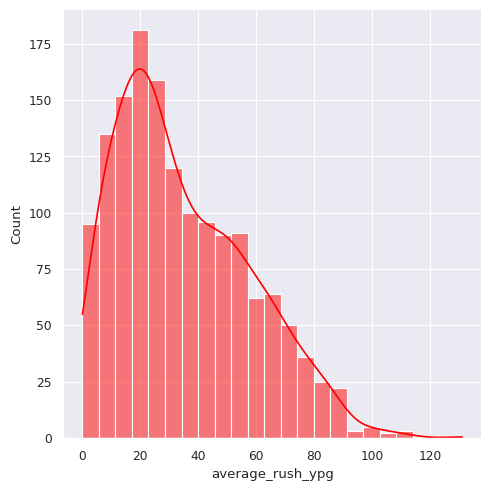

In [ ]:
'''fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.hist(players_qb['age'], bins = 10)'''
sns.displot(players_rb['average_rush_ypg'], kde = True, color = 'red')
players_rb.describe()

# Do teams acclimated to certain weather perform better in those conditions?

In [ ]:
cold = spreads[spreads['weather_temperature'] <= 32]
cold
hot = spreads[spreads['weather_temperature'] >= 85]
hot
print(hot.head())

      schedule_date  schedule_season schedule_week  schedule_playoff  \
10546      9/9/2012             2012             1             False   
10563     9/16/2012             2012             2             False   
10569     9/16/2012             2012             2             False   
10579     9/23/2012             2012             3             False   
10580     9/23/2012             2012             3             False   

                  team_home  score_home  score_away             team_away  \
10546        Denver Broncos          31          19   Pittsburgh Steelers   
10563  Jacksonville Jaguars           7          27        Houston Texans   
10569    San Diego Chargers          38          10      Tennessee Titans   
10579        Dallas Cowboys          16          10  Tampa Bay Buccaneers   
10580        Denver Broncos          25          31        Houston Texans   

      team_favorite_id  spread_favorite over_under_line  \
10546              DEN             -2.0      

<ipython-input-85-03bb67a553c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot['home_wins'] = (hot['score_home'] > hot['score_away']).astype(int)
<ipython-input-85-03bb67a553c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot['away_wins'] = (hot['score_away'] > hot['score_home']).astype(int)
<ipython-input-85-03bb67a553c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

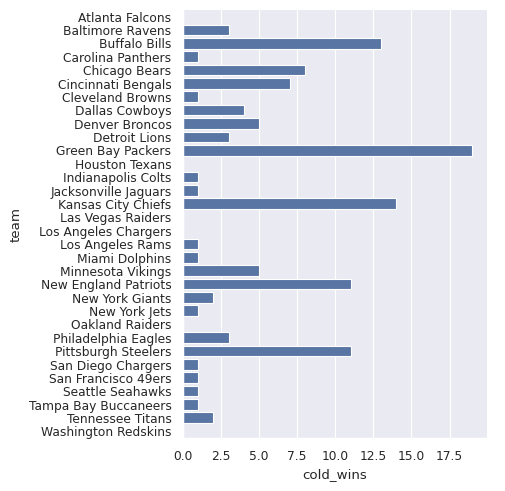

In [ ]:
# hot.columns
hot['home_wins'] = (hot['score_home'] > hot['score_away']).astype(int)
hot['away_wins'] = (hot['score_away'] > hot['score_home']).astype(int)
cold['home_wins'] = (cold['score_home'] > cold['score_away']).astype(int)
cold['away_wins'] = (cold['score_away'] > cold['score_home']).astype(int)
h_home_wins = hot.groupby('team_home')['home_wins'].sum()
h_away_wins = hot.groupby('team_away')['away_wins'].sum()
c_home_wins = cold.groupby('team_home')['home_wins'].sum()
c_away_wins = cold.groupby('team_away')['away_wins'].sum()
cold_wins = (
    cold.groupby('team_home')['home_wins'].sum()
    .add(cold.groupby('team_away')['away_wins'].sum(), fill_value = 0)
    .reset_index()
)
cold_wins.columns = ['team', 'cold_wins']

hot_wins = (
    hot.groupby('team_home')['home_wins'].sum()
    .add(hot.groupby('team_away')['away_wins'].sum(), fill_value = 0)
    .reset_index()
)
hot_wins.columns = ['team', 'hot_wins']

sns.catplot(data = cold_wins, x = 'cold_wins', y = 'team', kind = 'bar')

In [ ]:
cold_wins_top5 = cold_wins.sort_values(by='cold_wins', ascending=False).head(5)
hot_wins_top5 = hot_wins.sort_values(by='hot_wins', ascending=False).head(5)

[Text(0.5, 0, 'Wins in the Heat'), Text(0, 0.5, 'Team')]

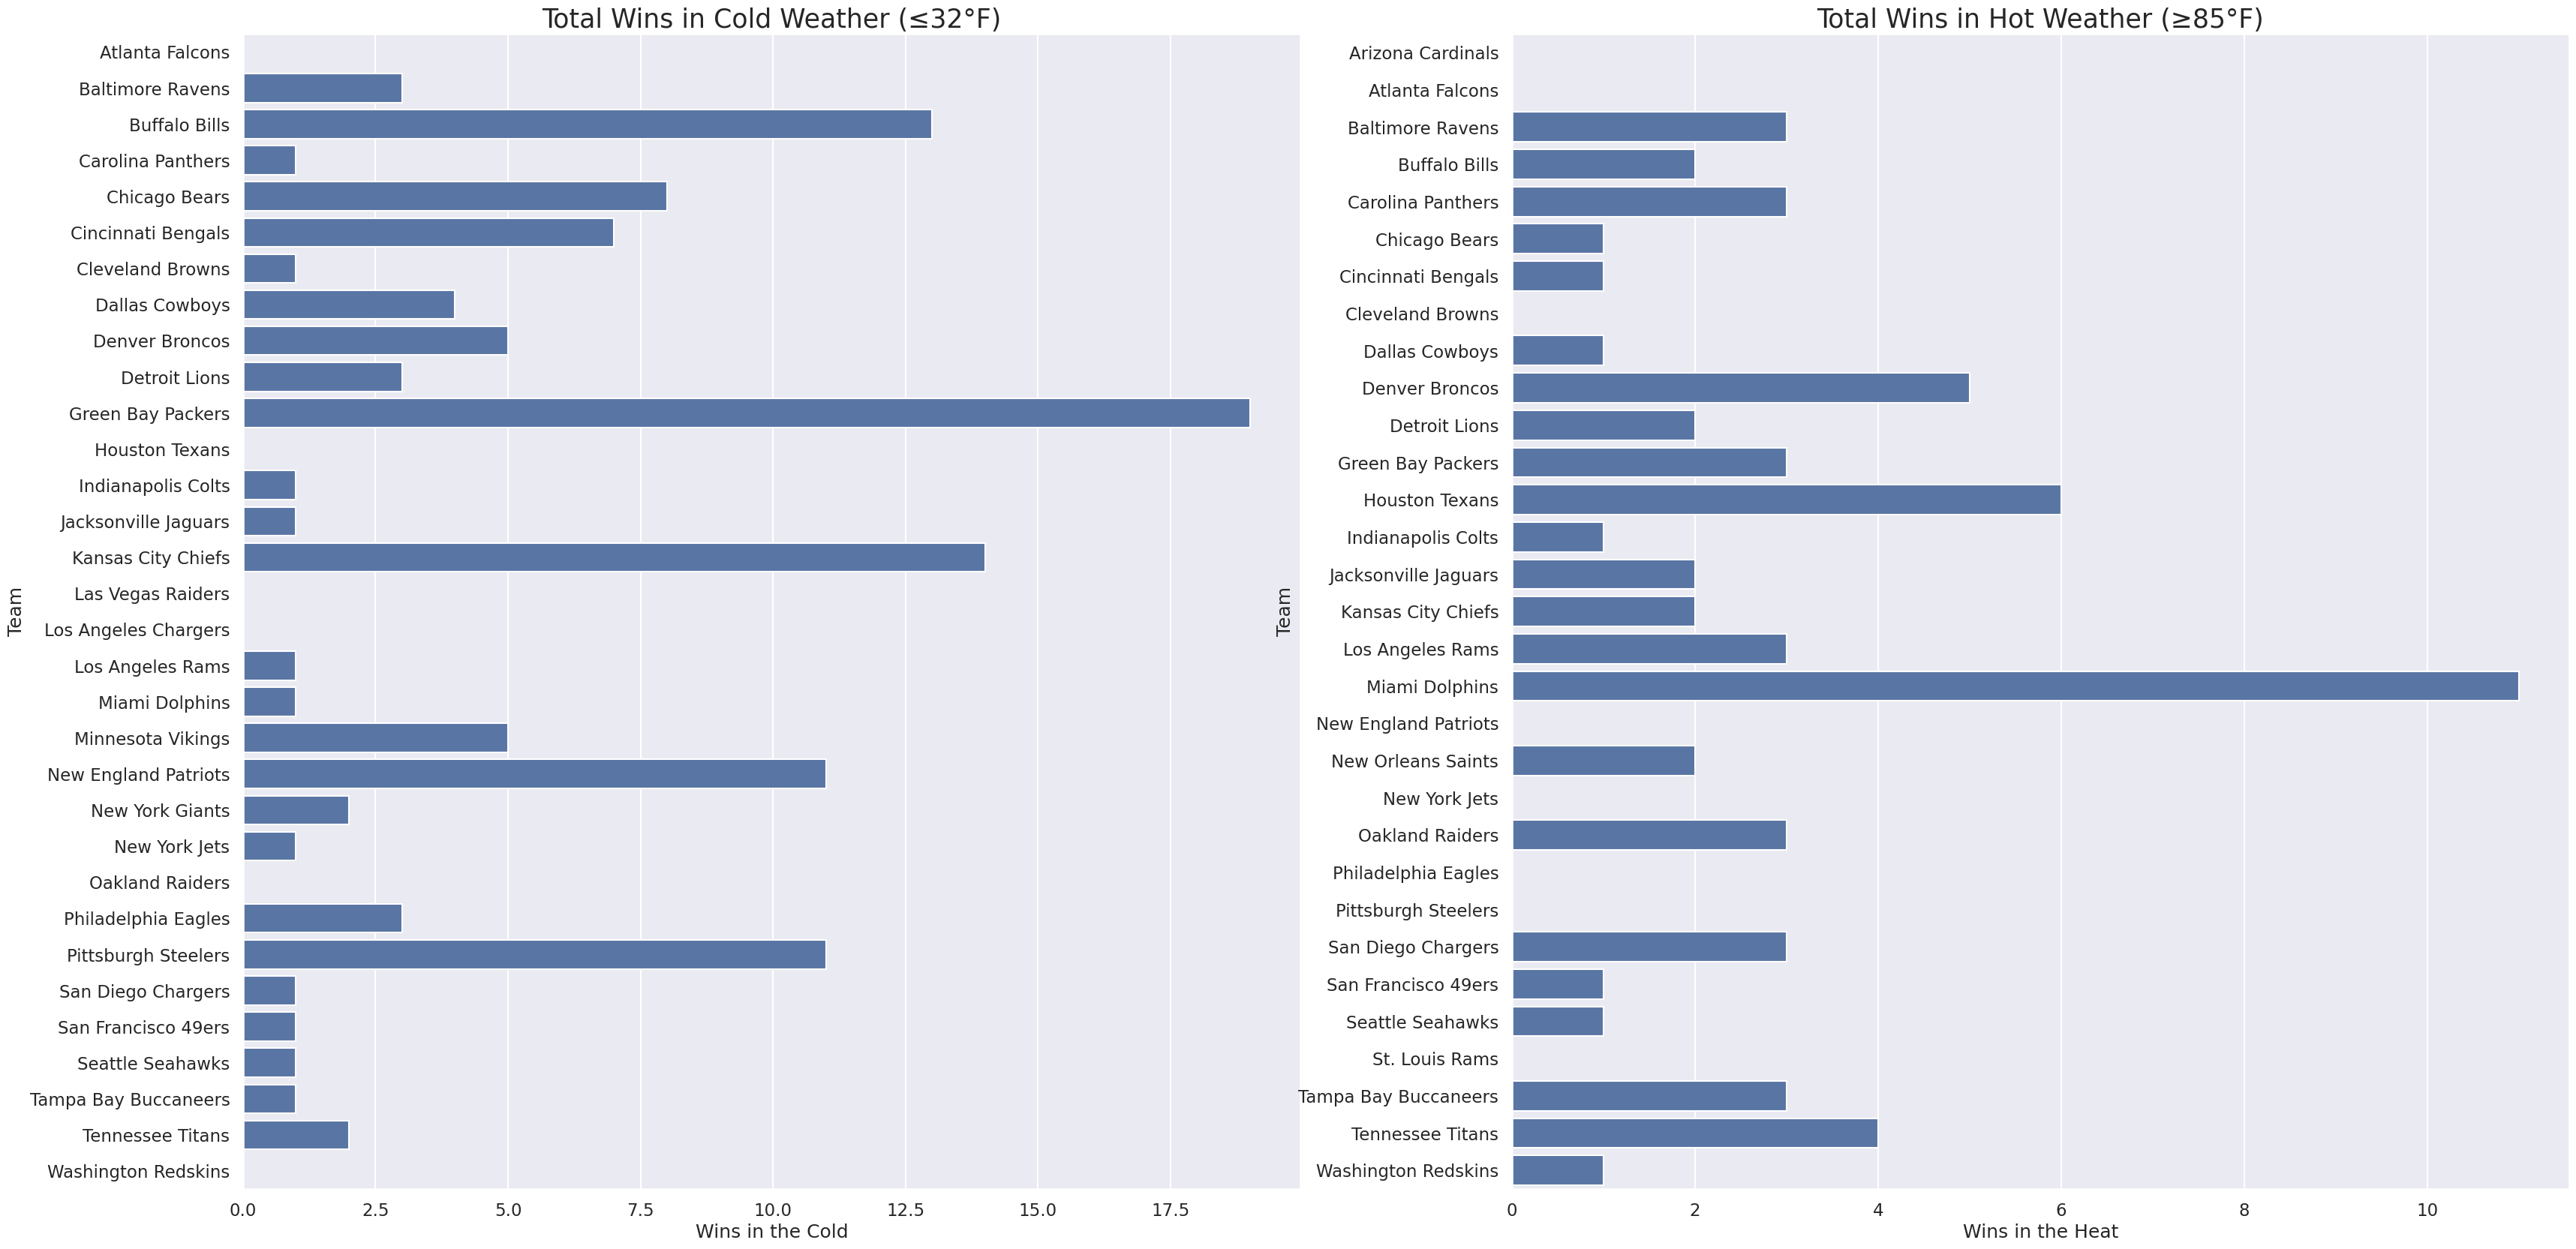

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (40,20))
sns.set_theme(style= 'darkgrid', context= 'talk')
sns.barplot(data = cold_wins, x = 'cold_wins', y = 'team', ax = ax[0])
ax[0].set_title("Total Wins in Cold Weather (≤32°F)", size = 25)
ax[0].set(xlabel = 'Wins in the Cold',
          ylabel = 'Team')
sns.barplot(data = hot_wins, x = 'hot_wins', y = 'team', ax = ax[1])
ax[1].set_title("Total Wins in Hot Weather (≥85°F)", size = 25)
ax[1].set(xlabel = 'Wins in the Heat',
          ylabel = 'Team')

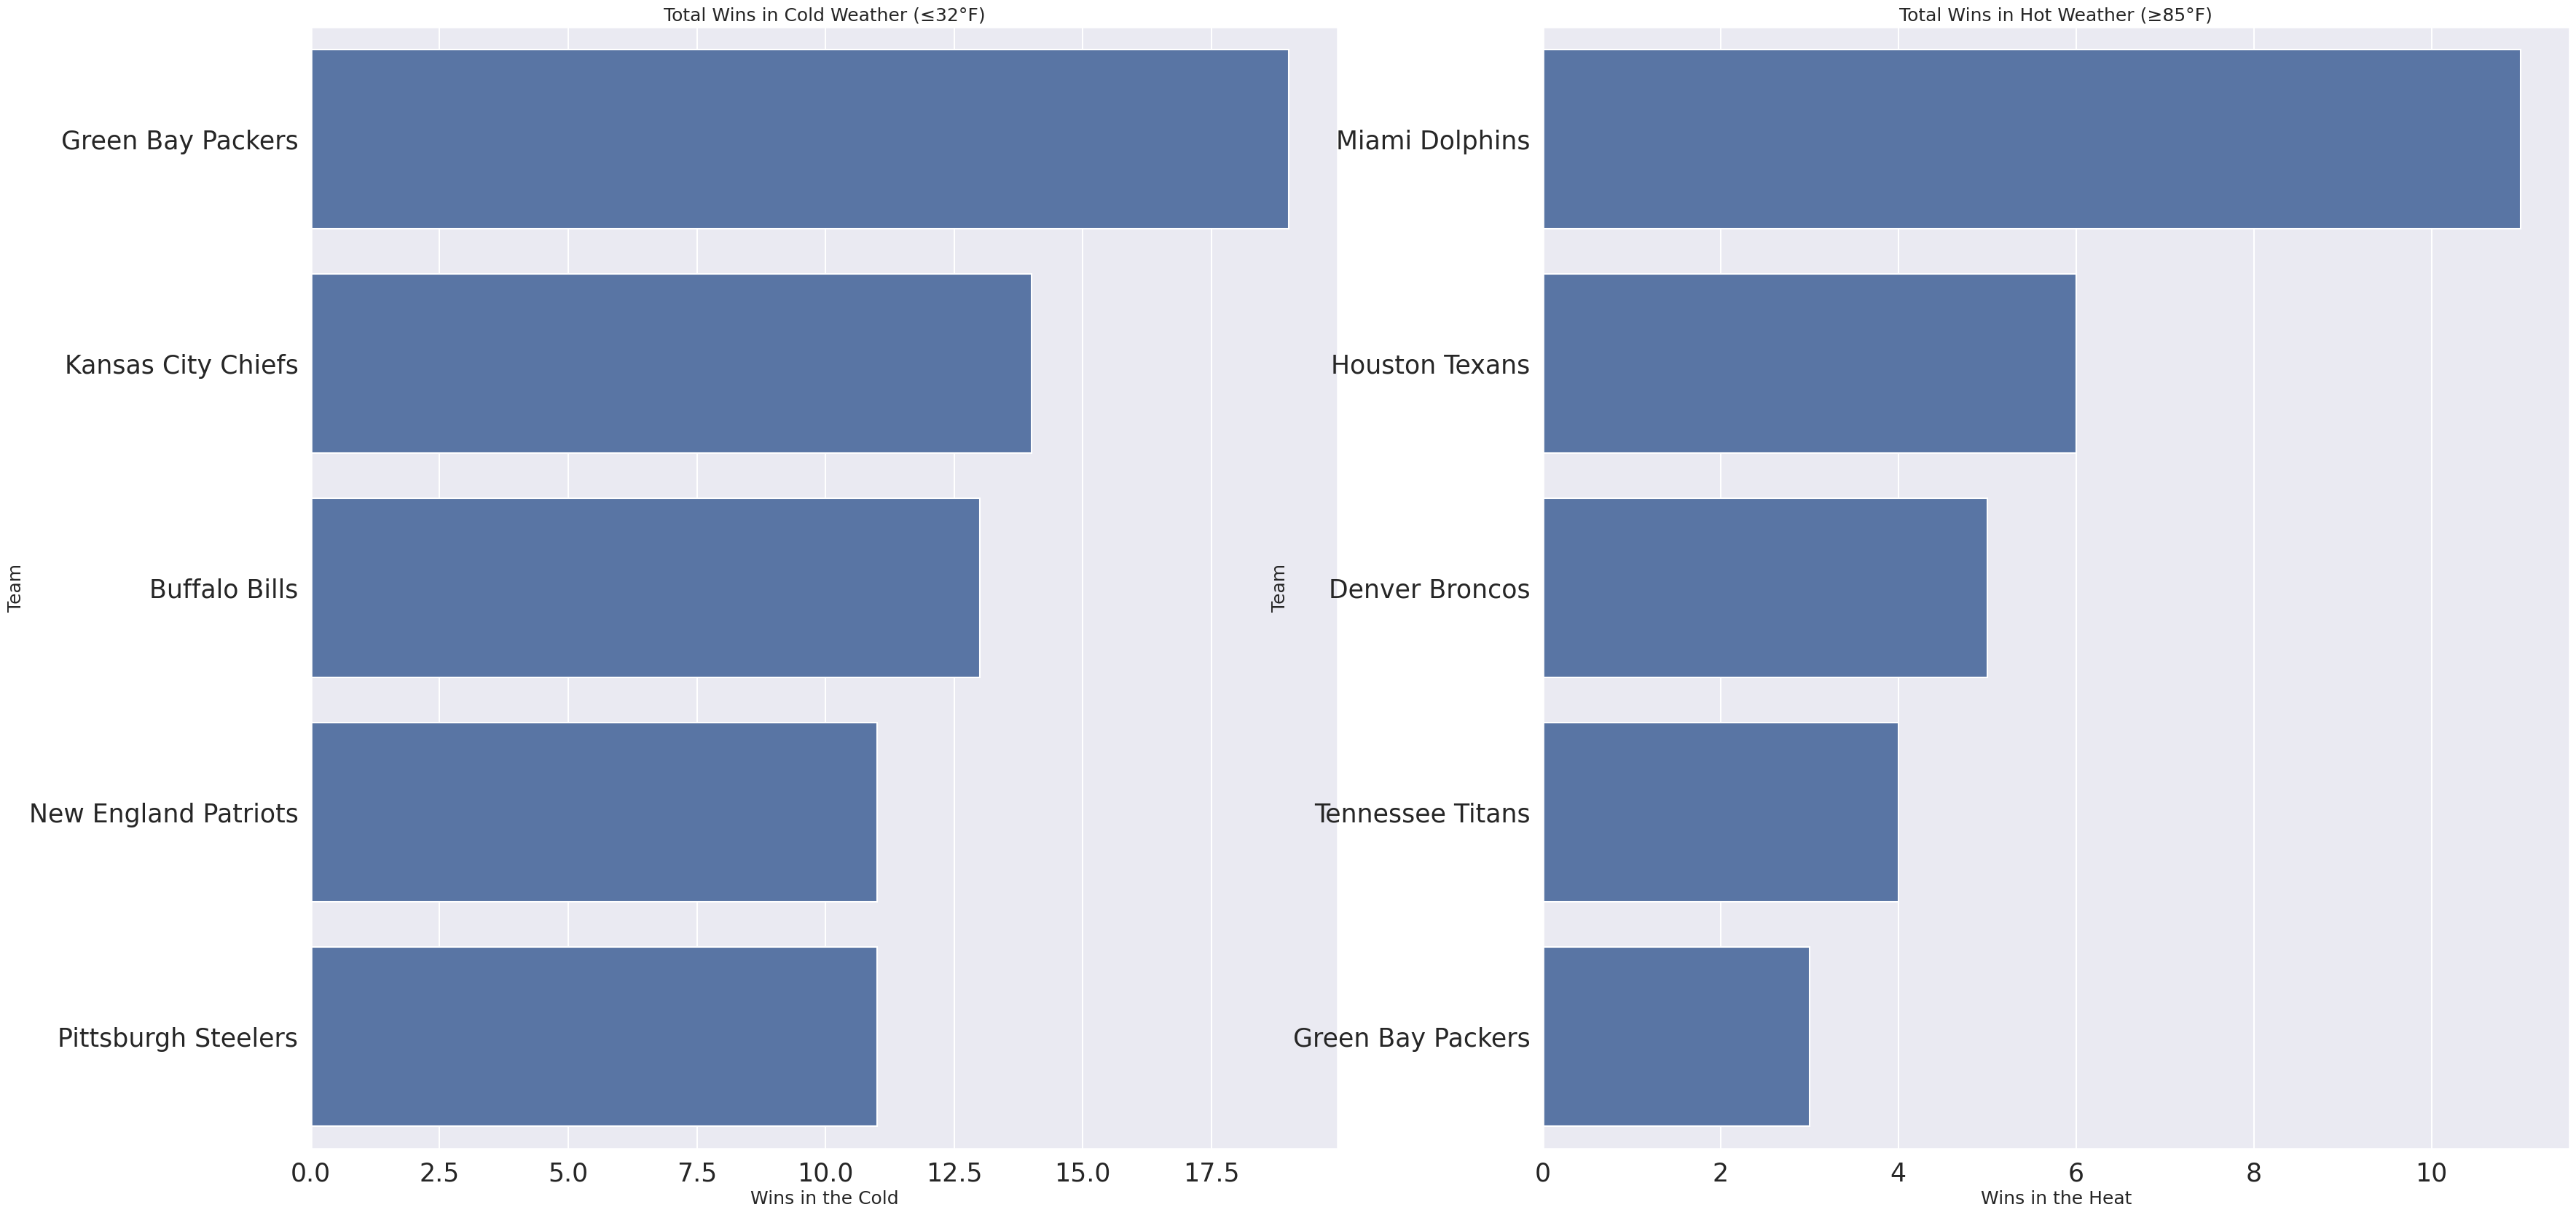

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (40,20))
sns.set_theme(style= 'darkgrid', context= 'talk')
sns.barplot(data = cold_wins_top5, x = 'cold_wins', y = 'team', ax = ax[0])
ax[0].set_title("Total Wins in Cold Weather (≤32°F)")
ax[0].set(xlabel = 'Wins in the Cold',
          ylabel = 'Team')
sns.barplot(data = hot_wins_top5, x = 'hot_wins', y = 'team', ax = ax[1])
ax[1].set_title("Total Wins in Hot Weather (≥85°F)")
ax[1].set(xlabel = 'Wins in the Heat',
          ylabel = 'Team')

# Change tick label sizes
ax[0].tick_params(axis='x', labelsize=25)  # x-axis
ax[0].tick_params(axis='y', labelsize=25)  # y-axis
ax[1].tick_params(axis='x', labelsize=25)  # x-axis
ax[1].tick_params(axis='y', labelsize=25)  # y-axis

In [ ]:
teams.head(5)

,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,...,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct
0,ARI,2012,1013,7595,28,25,25,268,168,25,...,4,4,0,1,7,0,5,11,0,0.313
1,ARI,2013,1020,9855,37,37,30,349,222,37,...,6,2,0,4,4,0,10,6,0,0.625
2,ARI,2014,983,9128,28,27,29,282,168,27,...,7,1,0,4,4,0,11,5,0,0.688
3,ARI,2015,1005,11337,53,53,28,455,318,53,...,6,2,0,7,1,0,13,3,0,0.813
4,ARI,2016,1080,10302,51,43,21,412,306,43,...,4,4,1,3,5,0,7,9,1,0.412


# DO TEAMS THAT PASS MORE HAVE MORE SUCCESS?

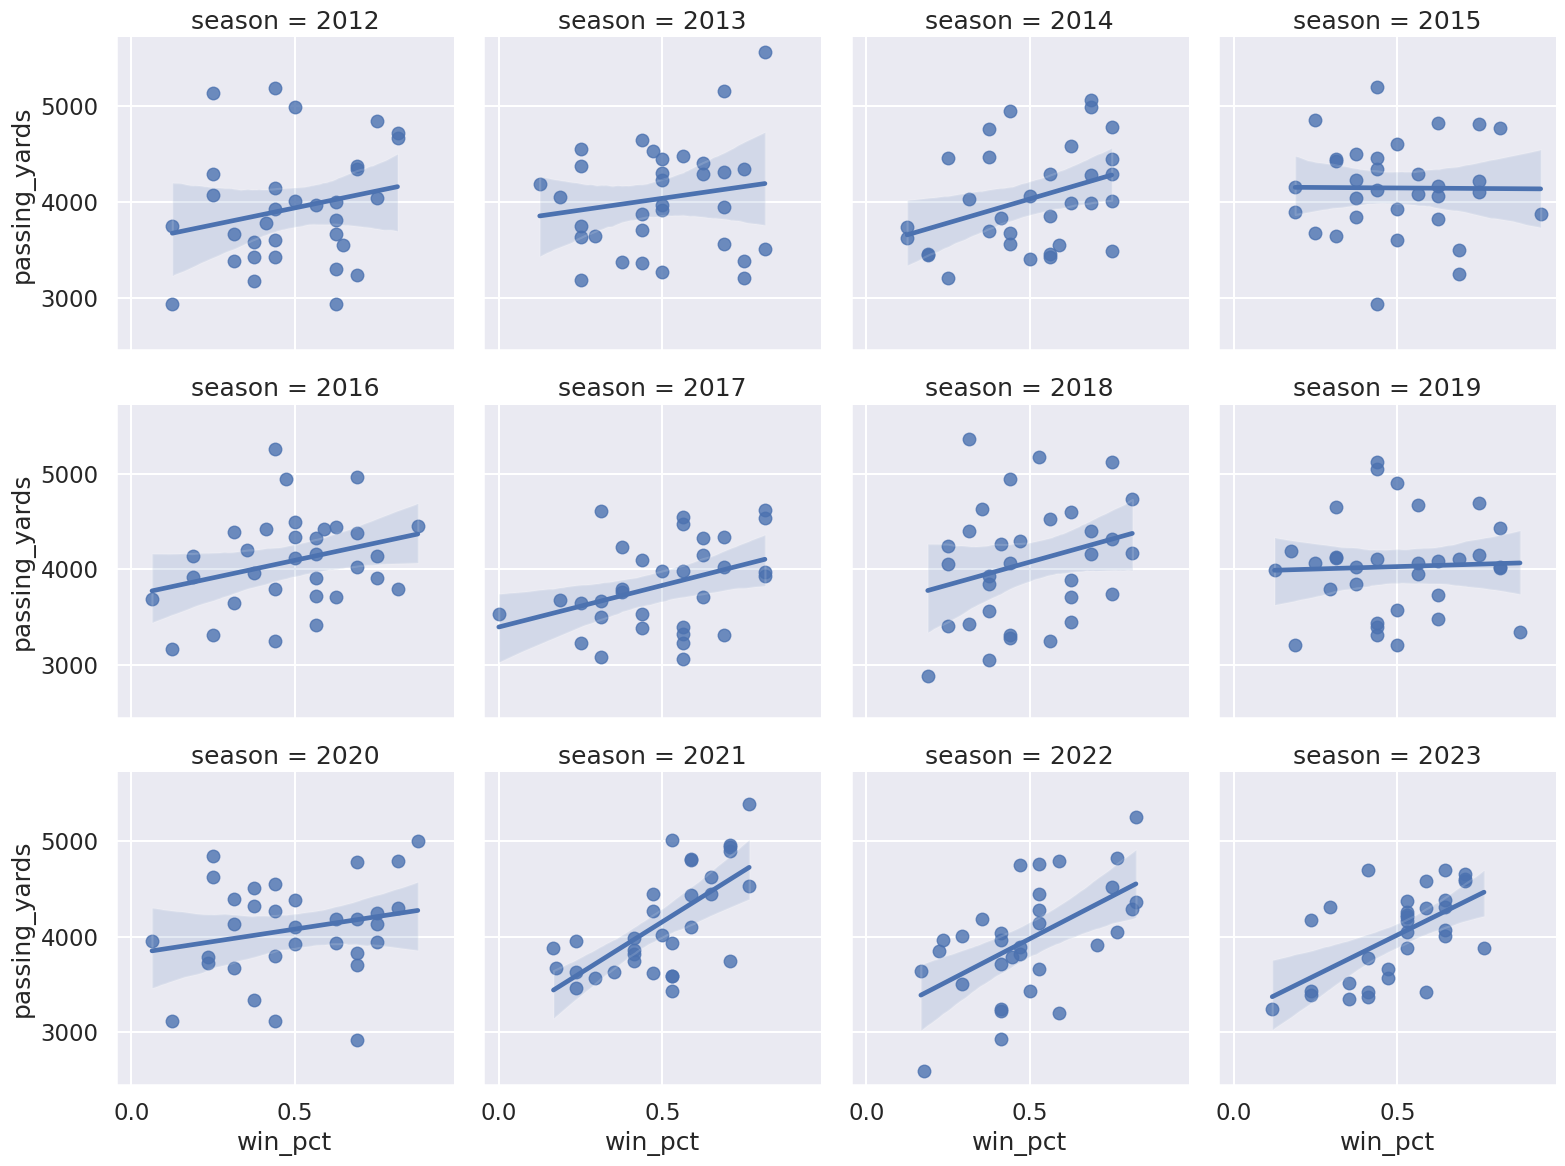

In [ ]:
sns.lmplot(data=teams, x='win_pct', y='passing_yards', col='season', col_wrap=4, height=4)

,win_pct,passing_yards
win_pct,1.000000,0.300896
passing_yards,0.300896,1.000000


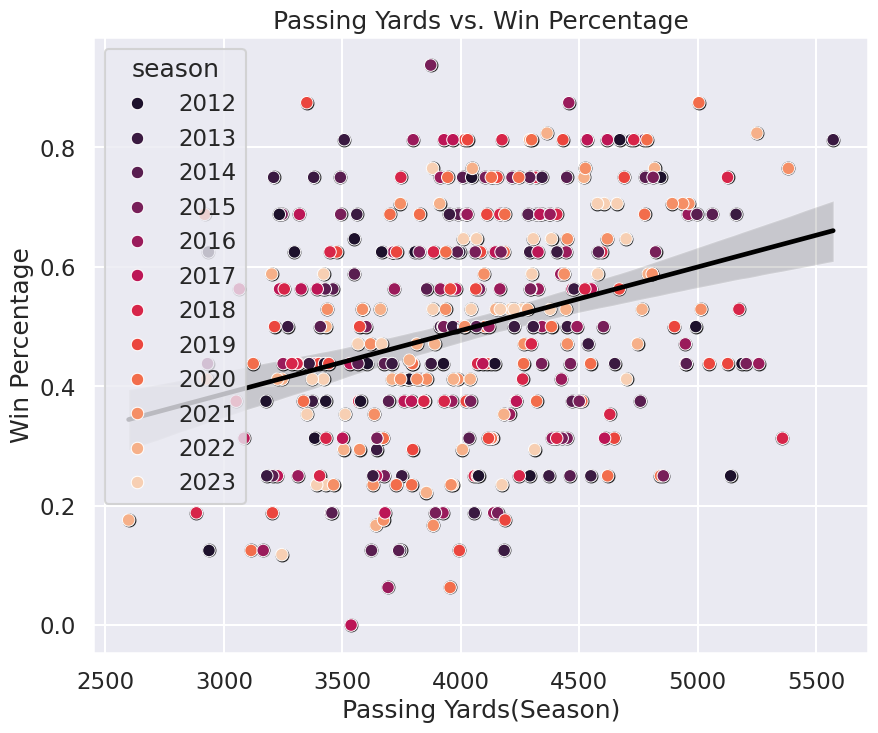

In [ ]:
plt.figure(figsize= (10,8))
palette = sns.color_palette('rocket', 12)
sns.regplot(teams, x = 'passing_yards', y = 'win_pct', color = 'black')
sns.scatterplot(teams, x = 'passing_yards', y = 'win_pct', hue = 'season', palette= palette)
plt.title('Passing Yards vs. Win Percentage')
plt.xlabel('Passing Yards(Season)')
plt.ylabel('Win Percentage')
# plt.xticks(rotation = 90)

teams[['win_pct', 'passing_yards']].corr()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'ARI'),
  Text(1, 0, 'ATL'),
  Text(2, 0, 'BAL'),
  Text(3, 0, 'BUF'),
  Text(4, 0, 'CAR'),
  Text(5, 0, 'CHI'),
  Text(6, 0, 'CIN'),
  Text(7, 0, 'CLE'),
  Text(8, 0, 'DAL'),
  Text(9, 0, 'DEN'),
  Text(10, 0, 'DET'),
  Text(11, 0, 'GB'),
  Text(12, 0, 'HOU'),
  Text(13, 0, 'IND'),
  Text(14, 0, 'JAX'),
  Text(15, 0, 'KC'),
  Text(16, 0, 'LA'),
  Text(17, 0, 'LAC'),
  Text(18, 0, 'LV'),
  Text(19, 0, 'MIA'),
  Text(20, 0, 'MIN'),
  Text(21, 0, 'NE'),
  Text(22, 0, 'NO'),
  Text(23, 0, 'NYG'),
  Text(24, 0, 'NYJ'),
  Text(25, 0, 'PHI'),
  Text(26, 0, 'PIT'),
  Text(27, 0, 'SEA'),
  Text(28, 0, 'SF'),
  Text(29, 0, 'TB'),
  Text(30, 0, 'TEN'),
  Text(31, 0, 'WAS')])

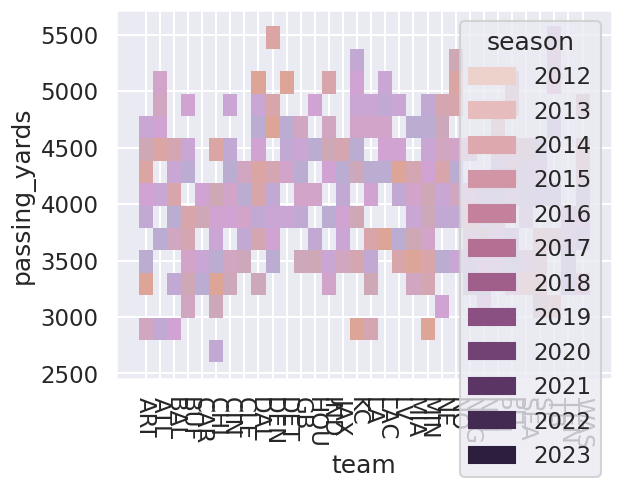

In [ ]:
sns.histplot(teams, x = 'team', y = 'passing_yards', hue = 'season', kde = True)
plt.xticks(rotation = 270)

In [ ]:
NFC_teams = teams[teams['team'].isin(['ARI', 'ATL', 'CAR', 'CHI', 'DAL', 'DET', 'GB',
                                      'NYG', 'PHI', 'WAS', 'MIN', 'NO', 'TB', 'LAR',
                                      'SF', 'SEA'])]
AFC_teams = teams[teams['team'].isin(['BUF', 'MIA', 'NE','NYJ', 'BAL', 'CIN', 'CLE', 'PIT',
                                      'HOU', 'IND', 'JAX', 'TEN', 'DEN', 'KC', 'LV', 'LAC'])]
                                      #could we make this easier to look at with spliting up the AFC and NFC into two differnet graphs?

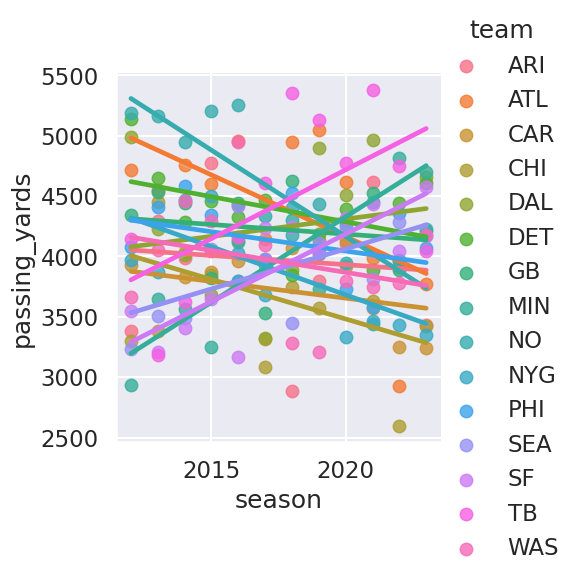

In [ ]:
sns.lmplot(NFC_teams, x = 'season', y = 'passing_yards', hue = 'team', ci = False) #'''Regression model with NFC teams'''

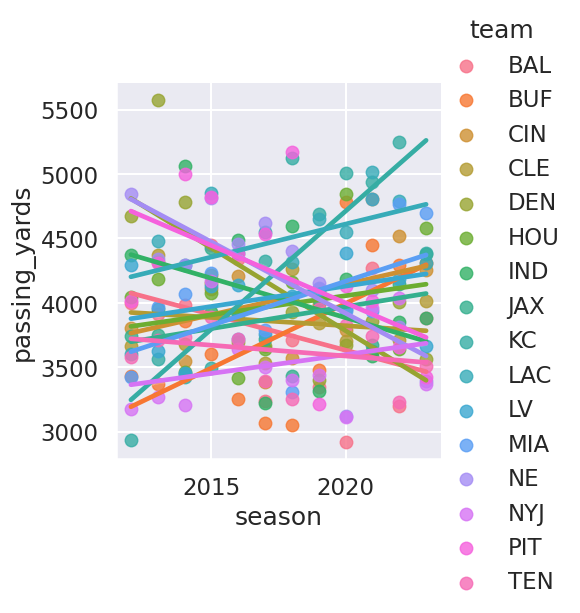

In [ ]:
sns.lmplot(AFC_teams, x = 'season', y = 'passing_yards', hue = 'team', ci = False) #"Regression model with AFC teams"

In [ ]:
division_mapping = {
    'DAL': 'NFC East', 'NYG': 'NFC East', 'PHI': 'NFC East', 'WAS': 'NFC East',
    'CHI': 'NFC North', 'DET': 'NFC North', 'GB': 'NFC North', 'MIN': 'NFC North',
    'ATL': 'NFC South', 'CAR': 'NFC South', 'NO': 'NFC South', 'TB': 'NFC South',
    'ARI': 'NFC West', 'LA': 'NFC West', 'SF': 'NFC West', 'SEA': 'NFC West',
    'BUF': 'AFC East', 'MIA': 'AFC East', 'NE': 'AFC East', 'NYJ': 'AFC East',
    'BAL': 'AFC North', 'CIN': 'AFC North', 'CLE': 'AFC North', 'PIT': 'AFC North',
    'HOU': 'AFC South', 'IND': 'AFC South', 'JAX': 'AFC South', 'TEN': 'AFC South',
    'DEN': 'AFC West', 'KC': 'AFC West', 'LV': 'AFC West', 'LAC': 'AFC West'
}
teams['division'] = teams['team'].map(division_mapping)

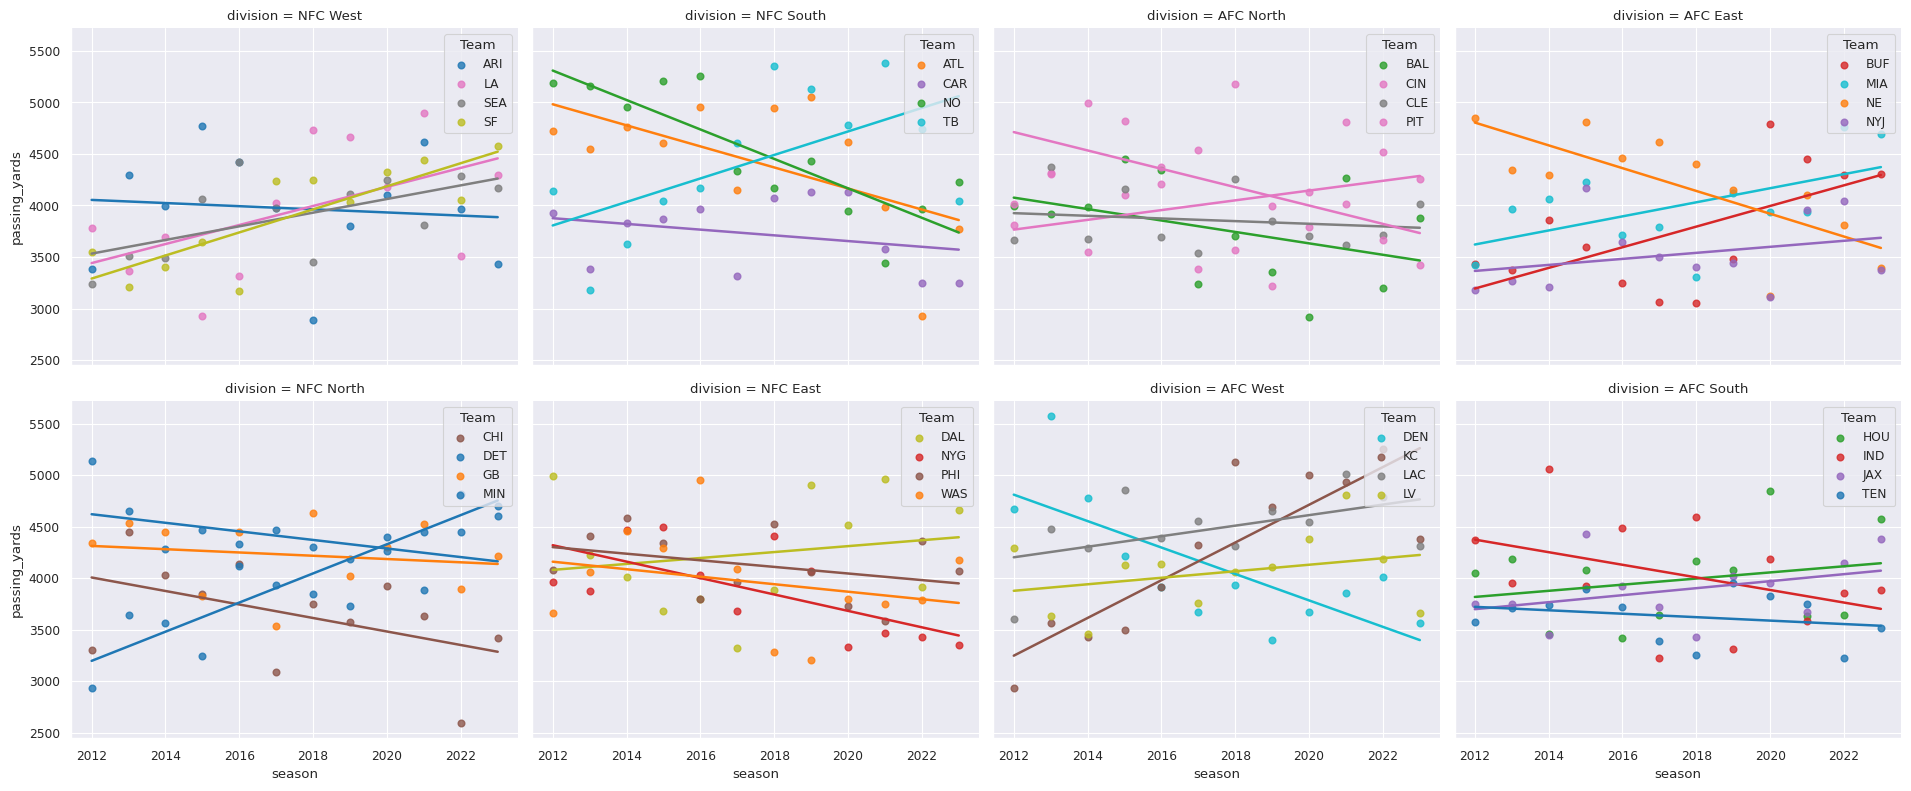

In [ ]:
# REGRESSION MODEL TO SEE THE CHANGES IN A TEAMS PASSING YARDS
sns.set_style('darkgrid')
sns.set_context('paper')
palette = sns.color_palette('tab10')
g = sns.lmplot(
    data=teams,
    x='season',
    y='passing_yards',
    hue='team',
    col='division',
    col_wrap=4,
    height=4,
    aspect=1.2,
    facet_kws={'legend_out': False},
    palette = palette,
    ci = None
)
for ax in g.axes.flat:
    division = ax.get_title().split(" = ")[-1]
    handles, labels = ax.get_legend_handles_labels()
    division_teams = teams[teams['division'] == division]['team'].unique()
    new_handles = [h for h, lbl in zip(handles, labels) if lbl in division_teams]
    new_labels = [lbl for lbl in labels if lbl in division_teams]
    ax.legend(new_handles, new_labels, title="Team", loc='upper right')

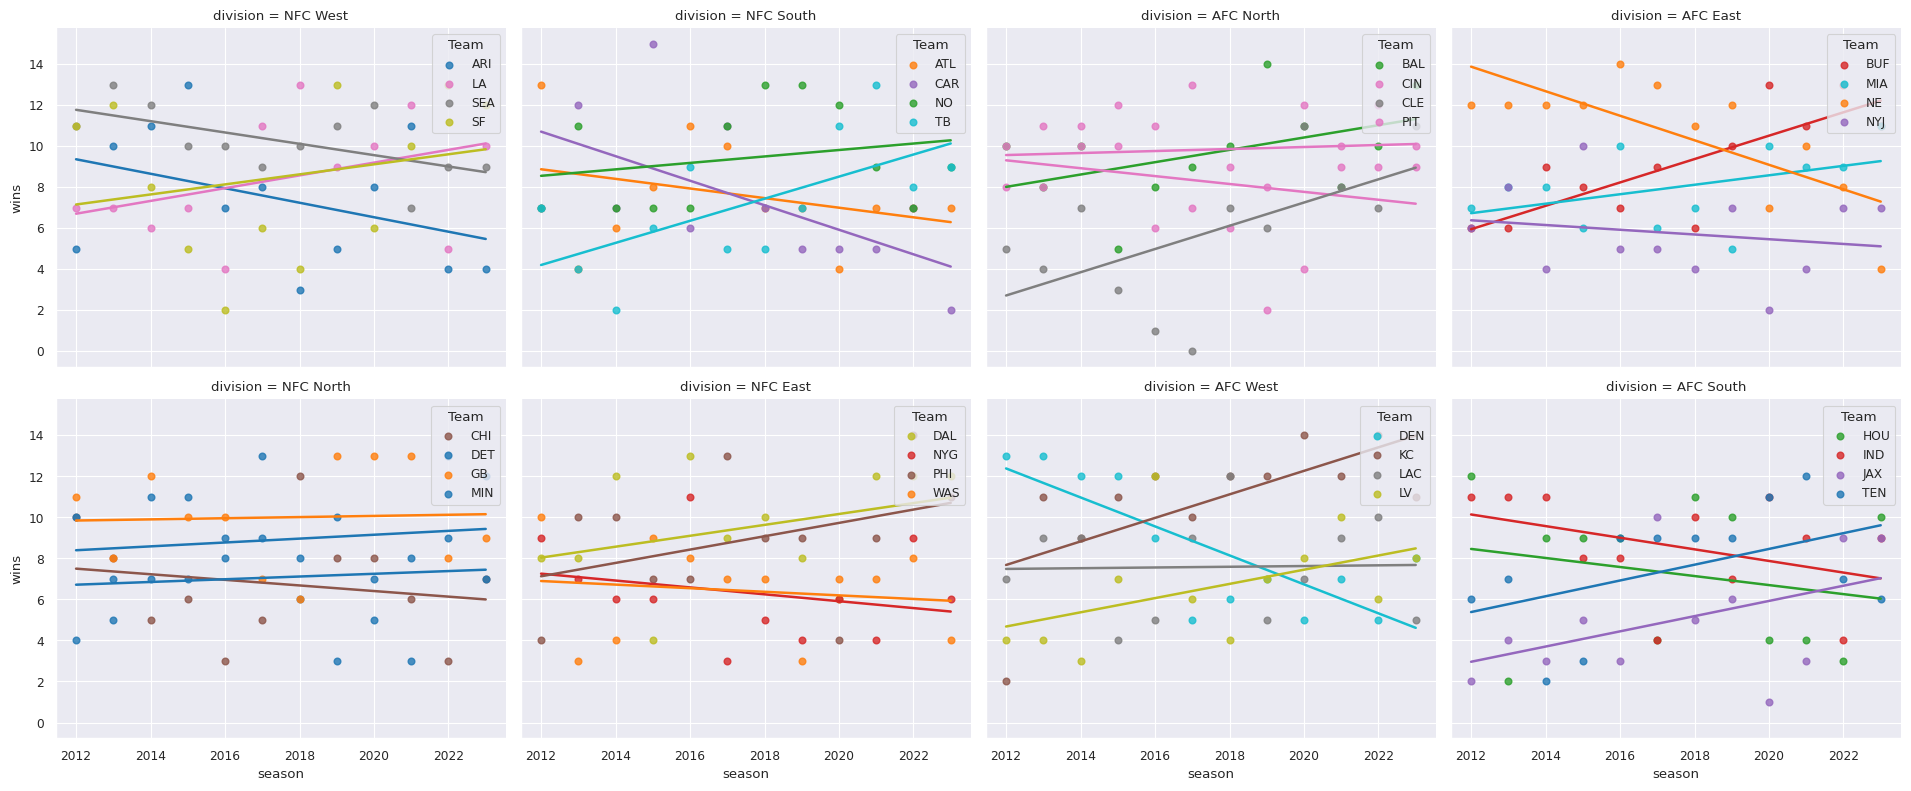

In [ ]:
#REGRESSION MODEL TO SEE HOW MANY WINS TEAMS IN EACH DIVISION HAVE OVER THE YEARS
palette = sns.color_palette('tab10')
g = sns.lmplot(
    data=teams,
    x='season',
    y='wins',
    hue='team',
    col='division',
    col_wrap=4,
    height=4,
    aspect=1.2,
    facet_kws={'legend_out': False},
    palette = palette,
    ci = None
)
for ax in g.axes.flat:
    division = ax.get_title().split(" = ")[-1]
    handles, labels = ax.get_legend_handles_labels()
    division_teams = teams[teams['division'] == division]['team'].unique()
    new_handles = [h for h, lbl in zip(handles, labels) if lbl in division_teams]
    new_labels = [lbl for lbl in labels if lbl in division_teams]
    ax.legend(new_handles, new_labels, title="Team", loc='upper right')

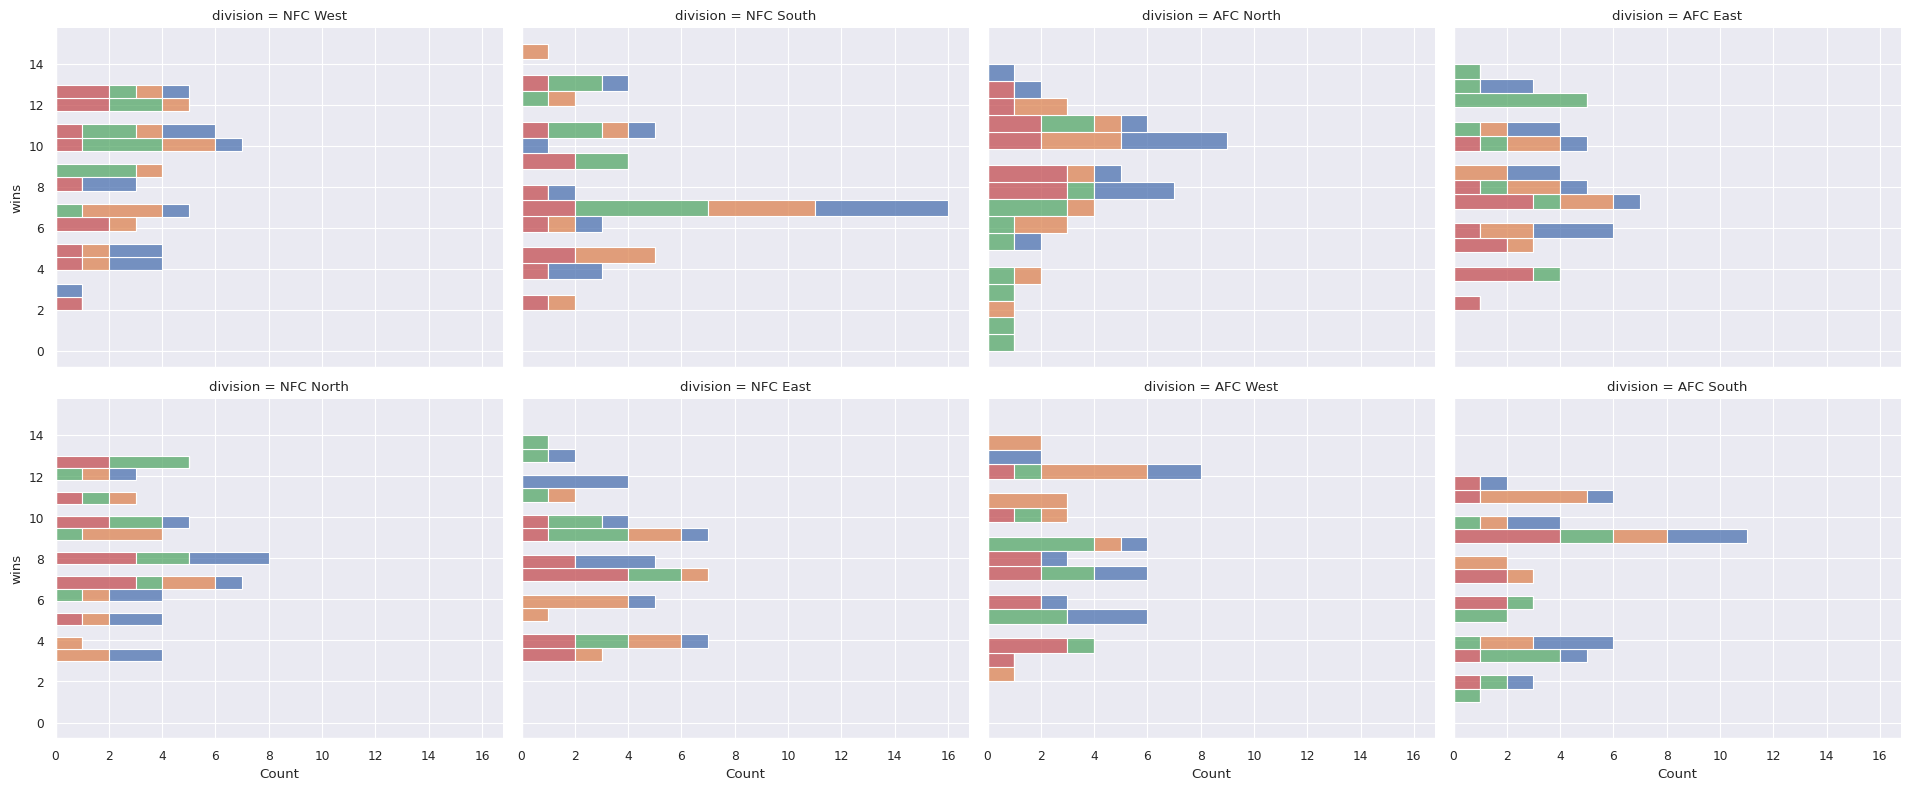

In [ ]:
#STACKED BAR PLOT OF A TEAMS WINS WITHOUT A LABEL JUST TO CHECK WHICH IS BETTER BETWEEN THIS AND THE ONE ABOVE. BINS 17 BC THATS HOW MANY GAMES / SZN
u = sns.FacetGrid(
    data = teams,
    col = 'division',
    col_wrap=4,
    height=4,
    aspect=1.2,
    sharex=True,
    sharey=True
)
u.map_dataframe(sns.histplot, y ='wins', hue='team', bins = 17, multiple='stack')

In [ ]:
spreads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3544 entries, 10542 to 14085
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        3544 non-null   object 
 1   schedule_season      3544 non-null   int64  
 2   schedule_week        3544 non-null   object 
 3   schedule_playoff     3544 non-null   bool   
 4   team_home            3544 non-null   object 
 5   score_home           3544 non-null   int64  
 6   score_away           3544 non-null   int64  
 7   team_away            3544 non-null   object 
 8   team_favorite_id     3544 non-null   object 
 9   spread_favorite      3544 non-null   float64
 10  over_under_line      3544 non-null   object 
 11  stadium              3544 non-null   object 
 12  stadium_neutral      3544 non-null   bool   
 13  weather_temperature  2502 non-null   float64
 14  weather_wind_mph     2501 non-null   float64
 15  weather_humidity     466 non-null    f

<ipython-input-100-61808fdf6250>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=favorite_location_counts, x='Favorite Location', y='Game Count', palette='coolwarm')


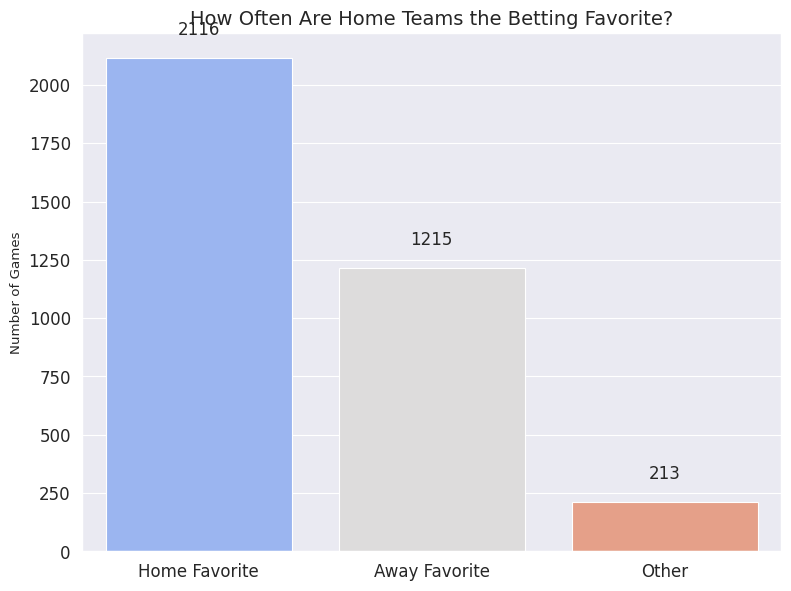

In [ ]:

spreads = spreads.dropna(subset=['spread_favorite', 'team_favorite_id'])

# Map team abbreviations to full names
abbrev_to_full = {
    'ARI': 'Arizona Cardinals', 'ATL': 'Atlanta Falcons', 'BAL': 'Baltimore Ravens',
    'BUF': 'Buffalo Bills', 'CAR': 'Carolina Panthers', 'CHI': 'Chicago Bears',
    'CIN': 'Cincinnati Bengals', 'CLE': 'Cleveland Browns', 'DAL': 'Dallas Cowboys',
    'DEN': 'Denver Broncos', 'DET': 'Detroit Lions', 'GB': 'Green Bay Packers',
    'HOU': 'Houston Texans', 'IND': 'Indianapolis Colts', 'JAX': 'Jacksonville Jaguars',
    'KC': 'Kansas City Chiefs', 'LV': 'Las Vegas Raiders', 'LVR': 'Las Vegas Raiders',
    'LA': 'Los Angeles Rams', 'LAR': 'Los Angeles Rams', 'MIA': 'Miami Dolphins',
    'MIN': 'Minnesota Vikings', 'NE': 'New England Patriots', 'NO': 'New Orleans Saints',
    'NYG': 'New York Giants', 'NYJ': 'New York Jets', 'OAK': 'Oakland Raiders',
    'PHI': 'Philadelphia Eagles', 'PIT': 'Pittsburgh Steelers', 'SD': 'San Diego Chargers',
    'SEA': 'Seattle Seahawks', 'SF': 'San Francisco 49ers', 'STL': 'St. Louis Rams',
    'TB': 'Tampa Bay Buccaneers', 'TEN': 'Tennessee Titans',
    'WAS': 'Washington Redskins', 'WSH': 'Washington Commanders'
}

spreads['favorite_team_full'] = spreads['team_favorite_id'].map(abbrev_to_full)

spreads['favorite_location'] = spreads.apply(
    lambda row: 'Home Favorite' if row['favorite_team_full'] == row['team_home']
    else ('Away Favorite' if row['favorite_team_full'] == row['team_away'] else 'Other'),
    axis=1
)

favorite_location_counts = spreads['favorite_location'].value_counts().reset_index()
favorite_location_counts.columns = ['Favorite Location', 'Game Count']

plt.figure(figsize=(8, 6))
sns.barplot(data=favorite_location_counts, x='Favorite Location', y='Game Count', palette='coolwarm')

plt.title('How Often Are Home Teams the Betting Favorite?', fontsize=14)
plt.ylabel('Number of Games')
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for index, row in favorite_location_counts.iterrows():
    plt.text(index, row['Game Count'] + 100, f"{int(row['Game Count'])}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-101-33b5e0b6f53d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=favorite_win_counts, x='Outcome', y='Game Count', palette='Set2')


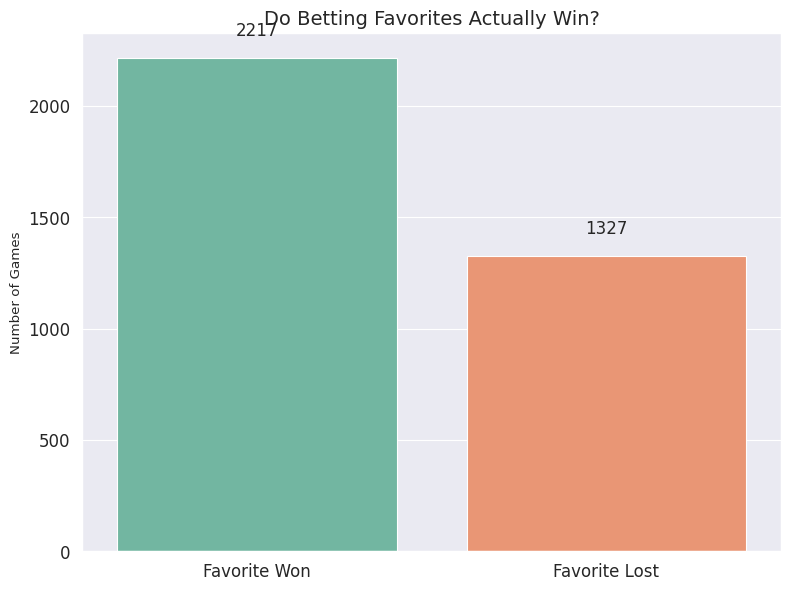

In [ ]:
spreads['favorite_team_full'] = spreads['team_favorite_id'].map(abbrev_to_full)
spreads['winner'] = spreads.apply(
    lambda row: row['team_home'] if row['score_home'] > row['score_away']
    else (row['team_away'] if row['score_away'] > row['score_home'] else 'Tie'),
    axis=1
)

spreads['favorite_won'] = spreads['winner'] == spreads['favorite_team_full']

favorite_win_counts = spreads['favorite_won'].value_counts().rename(index={
    True: 'Favorite Won',
    False: 'Favorite Lost'
}).reset_index()
favorite_win_counts.columns = ['Outcome', 'Game Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=favorite_win_counts, x='Outcome', y='Game Count', palette='Set2')

plt.title('Do Betting Favorites Actually Win?', fontsize=14)
plt.ylabel('Number of Games')
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for index, row in favorite_win_counts.iterrows():
    plt.text(index, row['Game Count'] + 100, f"{int(row['Game Count'])}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-102-f36559bcb4bf>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spread_win_rate_q1 = spread_games_q1.groupby('spread_bin')['favorite_won'].agg(['count', 'mean']).reset_index()
<ipython-input-102-f36559bcb4bf>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spread_win_rate_q1, x='Spread Range', y='Favorite Win Rate', palette='crest')


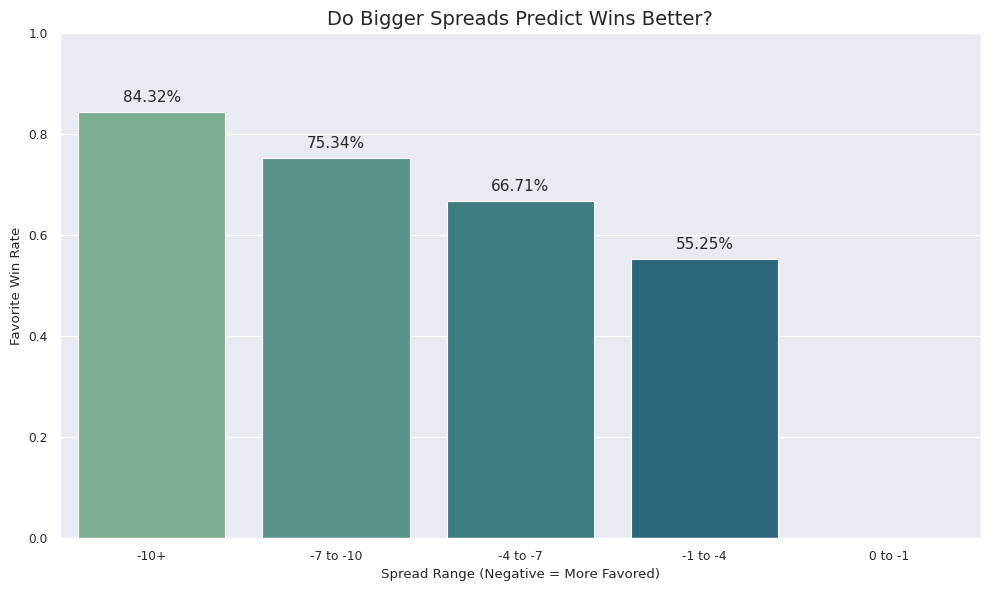

In [ ]:
spread_games_q1 = spreads.copy()
if 'favorite_team_full' not in spread_games_q1.columns:
    abbrev_to_full = {
        'ARI': 'Arizona Cardinals', 'ATL': 'Atlanta Falcons', 'BAL': 'Baltimore Ravens',
        'BUF': 'Buffalo Bills', 'CAR': 'Carolina Panthers', 'CHI': 'Chicago Bears',
        'CIN': 'Cincinnati Bengals', 'CLE': 'Cleveland Browns', 'DAL': 'Dallas Cowboys',
        'DEN': 'Denver Broncos', 'DET': 'Detroit Lions', 'GB': 'Green Bay Packers',
        'HOU': 'Houston Texans', 'IND': 'Indianapolis Colts', 'JAX': 'Jacksonville Jaguars',
        'KC': 'Kansas City Chiefs', 'LV': 'Las Vegas Raiders', 'LVR': 'Las Vegas Raiders',
        'LA': 'Los Angeles Rams', 'LAR': 'Los Angeles Rams', 'MIA': 'Miami Dolphins',
        'MIN': 'Minnesota Vikings', 'NE': 'New England Patriots', 'NO': 'New Orleans Saints',
        'NYG': 'New York Giants', 'NYJ': 'New York Jets', 'OAK': 'Oakland Raiders',
        'PHI': 'Philadelphia Eagles', 'PIT': 'Pittsburgh Steelers', 'SD': 'San Diego Chargers',
        'SEA': 'Seattle Seahawks', 'SF': 'San Francisco 49ers', 'STL': 'St. Louis Rams',
        'TB': 'Tampa Bay Buccaneers', 'TEN': 'Tennessee Titans',
        'WAS': 'Washington Redskins', 'WSH': 'Washington Commanders'
    }
    spread_games_q1['favorite_team_full'] = spread_games_q1['team_favorite_id'].map(abbrev_to_full)
if 'winner' not in spread_games_q1.columns:
    spread_games_q1['winner'] = spread_games_q1.apply(
        lambda row: row['team_home'] if row['score_home'] > row['score_away']
        else (row['team_away'] if row['score_away'] > row['score_home'] else 'Tie'),
        axis=1
    )
spread_games_q1 = spread_games_q1.dropna(subset=['spread_favorite', 'favorite_team_full'])
spread_games_q1['favorite_won'] = spread_games_q1['winner'] == spread_games_q1['favorite_team_full']

spread_games_q1['spread_bin'] = pd.cut(spread_games_q1['spread_favorite'],
                                       bins=[-20, -10, -7, -4, -1, 0],
                                       labels=['-10+', '-7 to -10', '-4 to -7', '-1 to -4', '0 to -1'])

spread_win_rate_q1 = spread_games_q1.groupby('spread_bin')['favorite_won'].agg(['count', 'mean']).reset_index()
spread_win_rate_q1.columns = ['Spread Range', 'Game Count', 'Favorite Win Rate']
spread_win_rate_q1.sort_values('Spread Range', inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=spread_win_rate_q1, x='Spread Range', y='Favorite Win Rate', palette='crest')

plt.title('Do Bigger Spreads Predict Wins Better?', fontsize=14)
plt.xlabel('Spread Range (Negative = More Favored)')
plt.ylabel('Favorite Win Rate')
plt.ylim(0, 1)

for index, row in spread_win_rate_q1.iterrows():
    if pd.notnull(row['Favorite Win Rate']):
        plt.text(index, row['Favorite Win Rate'] + 0.02, f"{row['Favorite Win Rate']:.2%}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# Do certain teams play better as underdogs?

<ipython-input-103-04e0615116ab>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=underdog_win_counts, x='winner', y='Underdog Wins', palette='rocket')


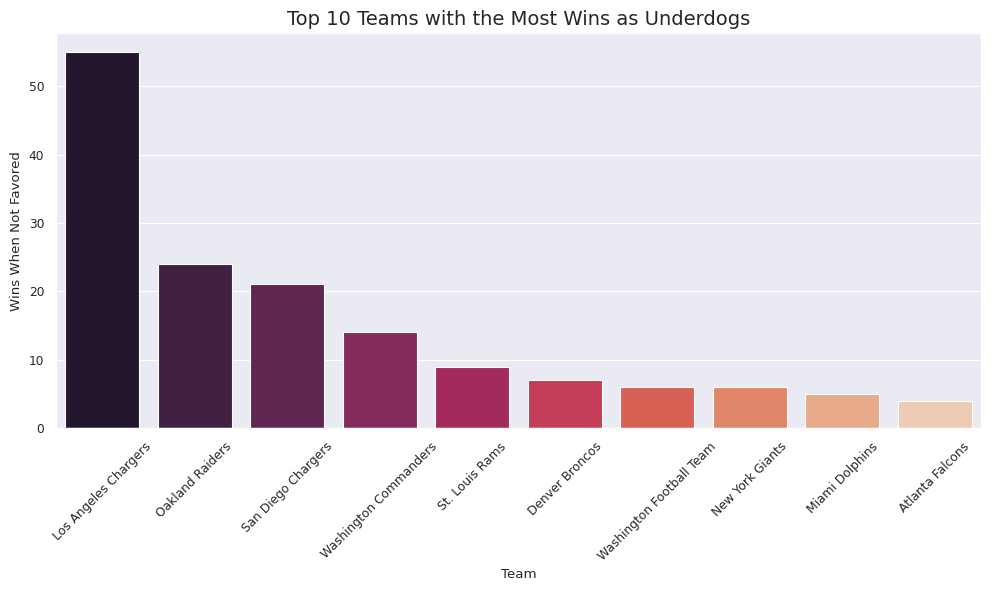

,winner,Underdog Wins
15,Los Angeles Chargers,55
22,Oakland Raiders,24
25,San Diego Chargers,21
31,Washington Commanders,14
28,St. Louis Rams,9
8,Denver Broncos,7
32,Washington Football Team,6
20,New York Giants,6
16,Miami Dolphins,5
1,Atlanta Falcons,4


In [ ]:
spreads = spreads.dropna(subset=['spread_favorite', 'team_favorite_id'])
spreads['favorite_team_full'] = spreads['team_favorite_id'].map(abbrev_to_full)
spreads['winner'] = spreads.apply(
    lambda row: row['team_home'] if row['score_home'] > row['score_away']
    else (row['team_away'] if row['score_away'] > row['score_home'] else 'Tie'),
    axis=1
)
underdog_games = spreads[
    (spreads['team_home'] != spreads['favorite_team_full']) &
    (spreads['team_away'] != spreads['favorite_team_full'])
].copy()
underdog_games.loc[:, 'underdog_won'] = (
    (underdog_games['winner'] != underdog_games['favorite_team_full']) &
    (underdog_games['winner'] != 'Tie')
)

underdog_win_counts = underdog_games[underdog_games['underdog_won']].groupby('winner').size().reset_index(name='Underdog Wins')
underdog_win_counts = underdog_win_counts.sort_values('Underdog Wins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=underdog_win_counts, x='winner', y='Underdog Wins', palette='rocket')

plt.title('Top 10 Teams with the Most Wins as Underdogs', fontsize=14)
plt.ylabel('Wins When Not Favored')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
underdog_win_counts

<ipython-input-106-d1a8c2455e71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underdogs_all_df['winner'] = underdogs_all_df.apply(
<ipython-input-106-d1a8c2455e71>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_underdog_teams, x='winner', y='Underdog Wins', palette='ch:s=-.2,r=.6')


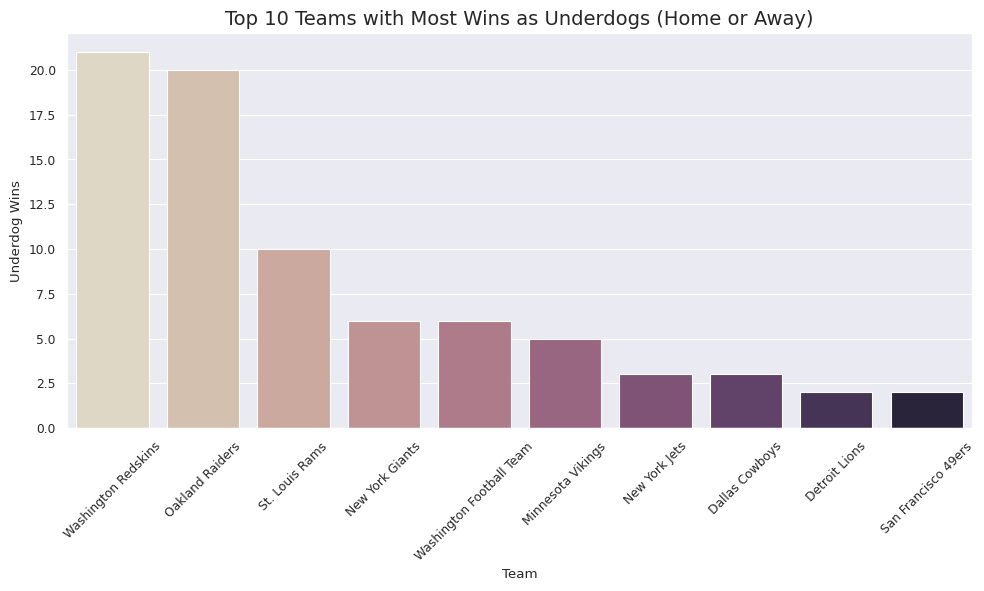

,winner,Underdog Wins
24,Washington Redskins,21
16,Oakland Raiders,20
21,St. Louis Rams,10
14,New York Giants,6
23,Washington Football Team,6
13,Minnesota Vikings,5
15,New York Jets,3
6,Dallas Cowboys,3
7,Detroit Lions,2
20,San Francisco 49ers,2


In [ ]:

underdogs_all_df = spreads.copy()
underdogs_all_df['favorite_team_full'] = underdogs_all_df['team_favorite_id'].map(abbrev_to_full)
underdogs_all_df = underdogs_all_df.dropna(subset=['spread_favorite', 'favorite_team_full', 'score_home', 'score_away'])
underdogs_all_df['winner'] = underdogs_all_df.apply(
    lambda row: row['team_home'] if row['score_home'] > row['score_away']
    else (row['team_away'] if row['score_away'] > row['score_home'] else 'Tie'),
    axis=1
)
underdogs_all_df = underdogs_all_df[
    (underdogs_all_df['team_home'] != underdogs_all_df['favorite_team_full']) &
    (underdogs_all_df['team_away'] != underdogs_all_df['favorite_team_full'])
]
underdogs_all_df['underdog_win'] = (
    (underdogs_all_df['winner'] != underdogs_all_df['favorite_team_full']) &
    (underdogs_all_df['winner'] != 'Tie')
)
underdog_win_counts = (
    underdogs_all_df[underdogs_all_df['underdog_win']]
    .groupby('winner')
    .size()
    .reset_index(name='Underdog Wins')
)
top_underdog_teams = underdog_win_counts.sort_values('Underdog Wins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_underdog_teams, x='winner', y='Underdog Wins', palette='ch:s=-.2,r=.6')
plt.title('Top 10 Teams with Most Wins as Underdogs (Home or Away)', fontsize=14)
plt.ylabel('Underdog Wins')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_underdog_teams

# Have betting spreads become more or less accurate through the years?

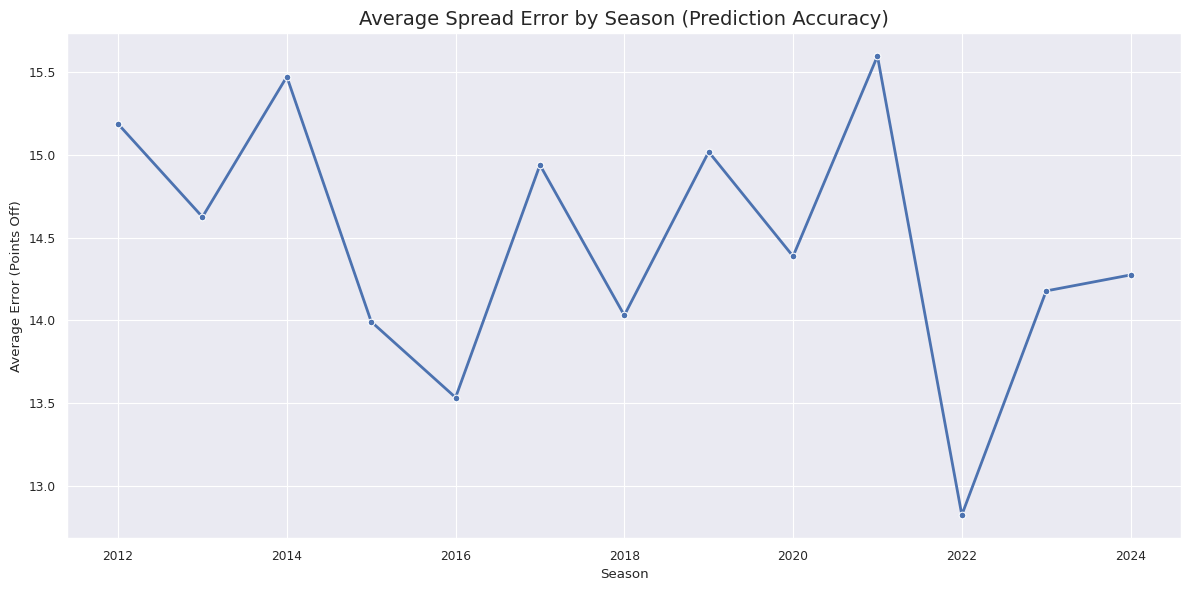

,schedule_season,spread_error
12,2024,14.274074
11,2023,14.177536
10,2022,12.823529
9,2021,15.596654
8,2020,14.386719
7,2019,15.017928
6,2018,14.029880
5,2017,14.938525
4,2016,13.533333
3,2015,13.991701


In [ ]:
abbrev_to_full = {
    'ARI': 'Arizona Cardinals', 'ATL': 'Atlanta Falcons', 'BAL': 'Baltimore Ravens',
    'BUF': 'Buffalo Bills', 'CAR': 'Carolina Panthers', 'CHI': 'Chicago Bears',
    'CIN': 'Cincinnati Bengals', 'CLE': 'Cleveland Browns', 'DAL': 'Dallas Cowboys',
    'DEN': 'Denver Broncos', 'DET': 'Detroit Lions', 'GB': 'Green Bay Packers',
    'HOU': 'Houston Texans', 'IND': 'Indianapolis Colts', 'JAX': 'Jacksonville Jaguars',
    'KC': 'Kansas City Chiefs', 'LV': 'Las Vegas Raiders', 'LVR': 'Las Vegas Raiders',
    'LA': 'Los Angeles Rams', 'LAR': 'Los Angeles Rams', 'MIA': 'Miami Dolphins',
    'MIN': 'Minnesota Vikings', 'NE': 'New England Patriots', 'NO': 'New Orleans Saints',
    'NYG': 'New York Giants', 'NYJ': 'New York Jets', 'OAK': 'Oakland Raiders',
    'PHI': 'Philadelphia Eagles', 'PIT': 'Pittsburgh Steelers', 'SD': 'San Diego Chargers',
    'SEA': 'Seattle Seahawks', 'SF': 'San Francisco 49ers', 'STL': 'St. Louis Rams',
    'TB': 'Tampa Bay Buccaneers', 'TEN': 'Tennessee Titans',
    'WAS': 'Washington Commanders', 'WSH': 'Washington Commanders'
}
spread_accuracy_df = spreads.copy()
spread_accuracy_df['favorite_team_full'] = spread_accuracy_df['team_favorite_id'].map(abbrev_to_full)
spread_accuracy_df = spread_accuracy_df.dropna(subset=['spread_favorite', 'favorite_team_full', 'score_home', 'score_away'])
def calc_margin(row):
    if row['favorite_team_full'] == row['team_home']:
        return row['score_home'] - row['score_away']
    elif row['favorite_team_full'] == row['team_away']:
        return row['score_away'] - row['score_home']
    else:
        return np.nan

spread_accuracy_df['actual_margin'] = spread_accuracy_df.apply(calc_margin, axis=1)
spread_accuracy_df['spread_error'] = (spread_accuracy_df['actual_margin'] - spread_accuracy_df['spread_favorite']).abs()
spread_error_by_year = spread_accuracy_df.groupby('schedule_season')['spread_error'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=spread_error_by_year, x='schedule_season', y='spread_error', marker='o', linewidth=2)

plt.title('Average Spread Error by Season (Prediction Accuracy)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average Error (Points Off)')
plt.grid(True)
plt.tight_layout()
plt.show()
spread_error_by_year.sort_values('schedule_season', ascending=False).head(10)


sns.set_color_codes('deep')
sns.set_context('paper')
plt.figure(figsize=(10, 10))
sns.boxplot(x="spread_favorite", y="team_home", data=spreads)
plt.title("Betting Spread vs. Home Field Advantage")
plt.ylabel('Home Team')
plt.xlabel('Spreads')
plt.show()

In [ ]:

team_map = {
    "ARI": "Arizona Cardinals",
    "ATL": "Atlanta Falcons",
    "BAL": "Baltimore Ravens",
    "BUF": "Buffalo Bills",
    "CAR": "Carolina Panthers",
    "CHI": "Chicago Bears",
    "CIN": "Cincinnati Bengals",
    "CLE": "Cleveland Browns",
    "DAL": "Dallas Cowboys",
    "DEN": "Denver Broncos",
    "DET": "Detroit Lions",
    "GB": "Green Bay Packers",
    "HOU": "Houston Texans",
    "IND": "Indianapolis Colts",
    "JAX": "Jacksonville Jaguars",
    "KC": "Kansas City Chiefs",
    "LAR": "Los Angeles Rams",
    "STL" : "Los Angeles Rams",
    "LV" : "Las Vegas Raiders",
    "LVR" : "Las Vegas Raiders",
    "OAK": "Las Vegas Raiders",
    "MIA": "Miami Dolphins",
    "MIN": "Minnesota Vikings",
    "NE": "New England Patriots",
    "NO": "New Orleans Saints",
    "NYG": "New York Giants",
    "NYJ": "New York Jets",
    "NJY": "New York Jets",
    "PHI": "Philadelphia Eagles",
    "PIT": "Pittsburgh Steelers",
    "SF": "San Francisco 49ers",
    "SEA": "Seattle Seahawks",
    "LAC": "Los Angeles Chargers",
    "TEN": "Tennessee Titans",
    "TB" : "Tampa Bay Buccaneers",
    "WAS": "Washington Commanders"
}

spreads['team_favorite_id'] = spreads['team_favorite_id'].replace(team_map)
print(spreads)

      schedule_date  schedule_season schedule_week  schedule_playoff  \
10542      9/5/2012             2012             1             False   
10543      9/9/2012             2012             1             False   
10544      9/9/2012             2012             1             False   
10545      9/9/2012             2012             1             False   
10546      9/9/2012             2012             1             False   
...             ...              ...           ...               ...   
14081     1/19/2025             2024      Division              True   
14082     1/19/2025             2024      Division              True   
14083     1/26/2025             2024    Conference              True   
14084     1/26/2025             2024    Conference              True   
14085      2/9/2025             2024     Superbowl              True   

                 team_home  score_home  score_away              team_away  \
10542      New York Giants          17          24        

In [ ]:
spreads.team_favorite_id.value_counts()

,count
team_favorite_id,
Kansas City Chiefs,177
New England Patriots,165
Baltimore Ravens,155
Green Bay Packers,153
Seattle Seahawks,148
Philadelphia Eagles,145
San Francisco 49ers,138
New Orleans Saints,134
Pittsburgh Steelers,131


In [ ]:
# spreads.loc[spreads['team_favorite_id'] == 'PICK', 'team_favorite_id'] = spreads['team_home']

spreads[spreads["spread_favorite"] == 0.0]


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,favorite_team_full,favorite_location,winner,favorite_won
10632,10/15/2012,2012,6,False,San Diego Chargers,24,35,Denver Broncos,PICK,0.0,...,Qualcomm Stadium,False,78.0,7.0,50.0,NaN,NaN,Other,Denver Broncos,False
10752,12/16/2012,2012,15,False,Atlanta Falcons,34,0,New York Giants,PICK,0.0,...,Georgia Dome,False,72.0,0.0,NaN,indoor,NaN,Other,Atlanta Falcons,False
10900,10/14/2013,2013,6,False,San Diego Chargers,19,9,Indianapolis Colts,PICK,0.0,...,Qualcomm Stadium,False,69.0,3.0,69.0,NaN,NaN,Other,San Diego Chargers,False
10940,11/3/2013,2013,9,False,Washington Redskins,30,24,San Diego Chargers,PICK,0.0,...,FedEx Field,False,57.0,20.0,41.0,NaN,NaN,Other,Washington Redskins,False
11380,9/27/2015,2015,3,False,Dallas Cowboys,28,39,Atlanta Falcons,PICK,0.0,...,Cowboys Stadium,False,72.0,0.0,NaN,indoor,NaN,Other,Atlanta Falcons,False
11459,11/1/2015,2015,8,False,Pittsburgh Steelers,10,16,Cincinnati Bengals,PICK,0.0,...,Heinz Field,False,63.0,9.0,NaN,NaN,NaN,Other,Cincinnati Bengals,False
11498,11/22/2015,2015,11,False,Minnesota Vikings,13,30,Green Bay Packers,PICK,0.0,...,TCF Bank Stadium,False,32.0,7.0,NaN,NaN,NaN,Other,Green Bay Packers,False
11532,12/6/2015,2015,13,False,Tampa Bay Buccaneers,23,19,Atlanta Falcons,PICK,0.0,...,Raymond James Stadium,False,78.0,11.0,NaN,NaN,NaN,Other,Tampa Bay Buccaneers,False
11626,9/15/2016,2016,2,False,Buffalo Bills,31,37,New York Jets,PICK,0.0,...,New Era Field,False,54.0,2.0,NaN,NaN,NaN,Other,New York Jets,False
11756,11/14/2016,2016,10,False,New York Giants,21,20,Cincinnati Bengals,PICK,0.0,...,MetLife Stadium,False,54.0,1.0,NaN,NaN,NaN,Other,New York Giants,False


# Do some teams have bigger home field advantages? Is this reflected in the spread?

<Axes: xlabel='spread_favorite', ylabel='team_home'>

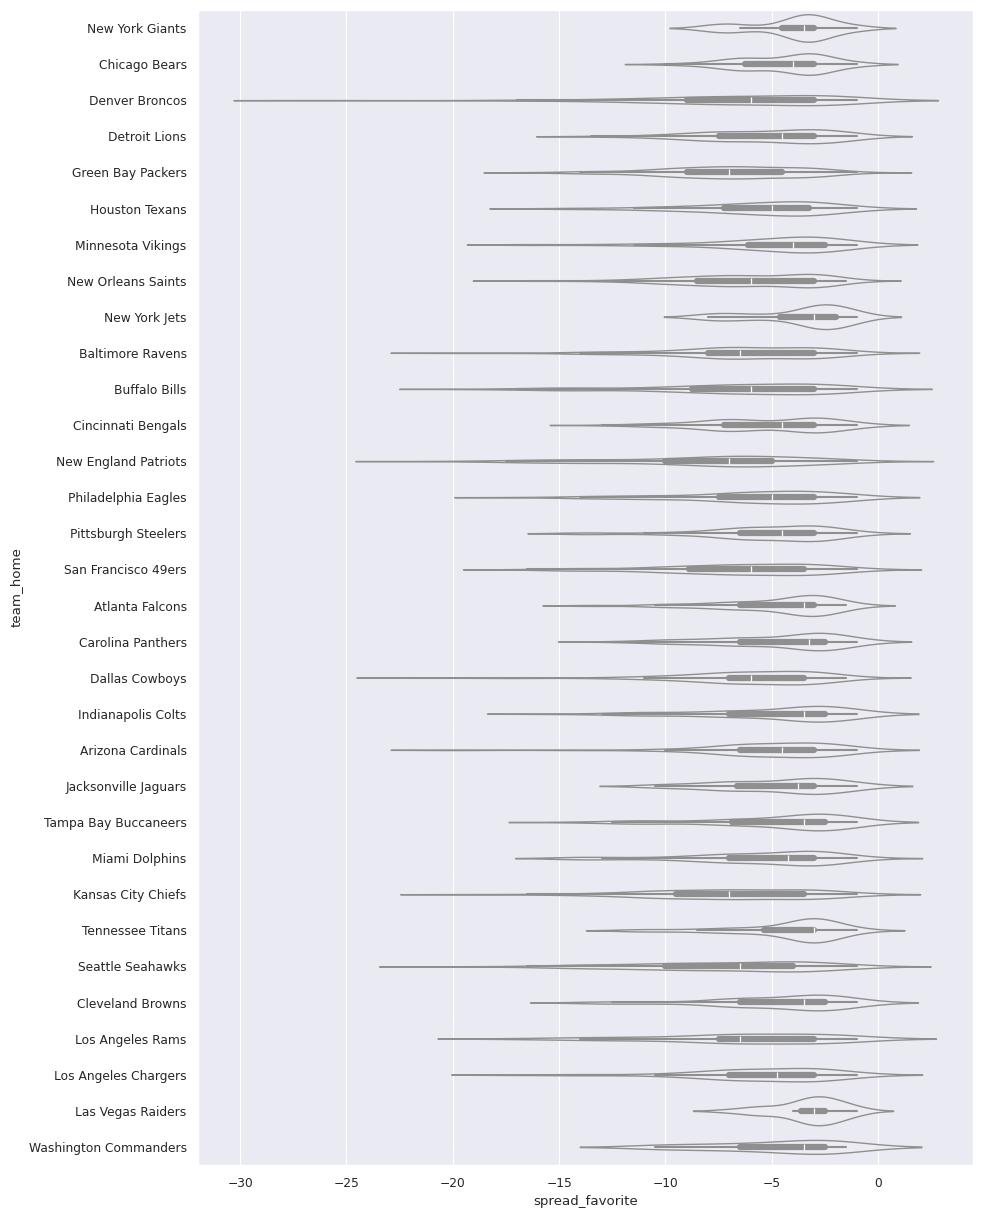

In [ ]:
sns.set_palette('Purples')
plt.figure(figsize= (10,15))
sns.violinplot(data = home_team_fav,
            x = 'spread_favorite',
            y = 'team_home')

<Axes: xlabel='spread_favorite', ylabel='team_away'>

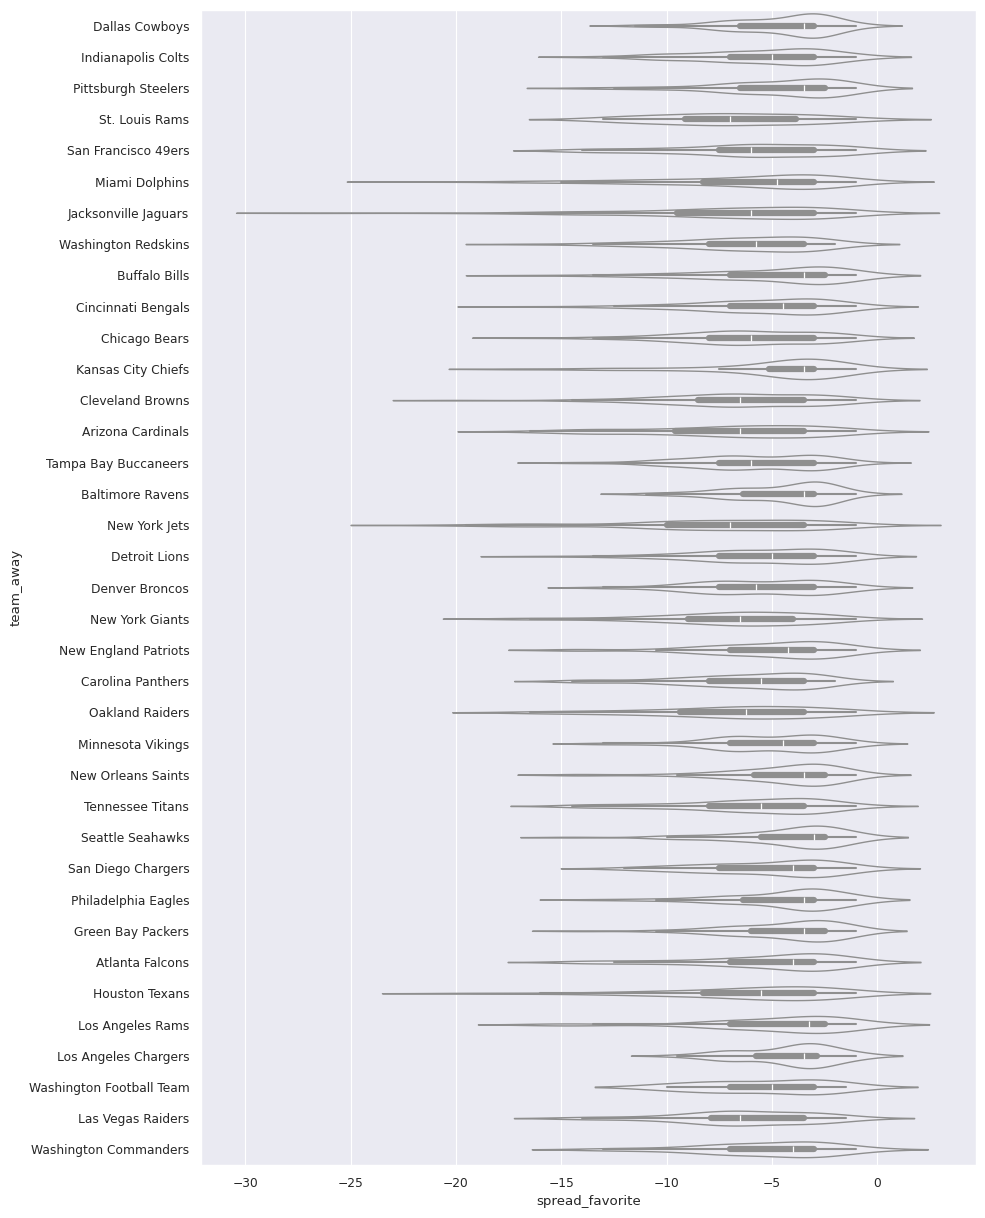

In [ ]:
sns.set_palette('Purples')
plt.figure(figsize = (10,15))
sns.violinplot(data = home_team_fav,
            x = 'spread_favorite',
            y = 'team_away')

# Exploring field goal stats

In [ ]:
teams['fg_made'] = teams['fg_points'] / 3

In [ ]:
teams['xp_pct'] = (teams['xp_points'] / teams['extra_point_attempt']) * 100
teams['fg_pct'] = (teams['fg_made'] / teams['field_goal_attempt']) * 100
teams.field_goal_attempt.value_counts()

,count
field_goal_attempt,
29,32
26,29
25,28
24,27
30,27
27,23
23,22
28,21
21,20


In [ ]:
teams.fg_points.value_counts()

,count
fg_points,
87,32
78,29
75,28
72,27
90,27
81,23
69,22
84,21
63,20


# Exploring Draft Pick Data

In [ ]:
players_qb.draft_round.value_counts()

,count
draft_round,
1.0,318
8.0,115
3.0,94
2.0,89
6.0,77
4.0,53
5.0,41
7.0,32


In [ ]:
players_qb.columns

Index(['team', 'player_id', 'player_name', 'position', 'season', 'depth',
       'pass_attempts', 'complete_pass', 'incomplete_pass', 'passing_yards',
       'passing_air_yards', 'pass_td', 'interception', 'targets', 'receptions',
       'receiving_yards', 'yards_after_catch', 'reception_td', 'rush_attempts',
       'rushing_yards', 'run_td', 'fantasy_points_ppr', 'comp_pct', 'ypa',
       'yptarget', 'ypr', 'touches', 'total_tds', 'total_yards', 'yptouch',
       'games', 'pass_ypg', 'rec_ypg', 'rush_ypg', 'ypg', 'ppg',
       'passer_rating', 'game_type', 'team_total_snaps', 'team_yards_gained',
       'team_pass_snaps_count', 'team_pass_snaps_pct', 'team_targets',
       'team_receptions', 'team_rush_snaps_count', 'team_rush_snaps_pct',
       'team_rushing_yards', 'team_run_td', 'offense_snaps', 'draft_year',
       'draft_round', 'draft_ovr', 'height', 'weight', 'college', 'age',
       'wins', 'losses', 'win_pct', 'seasons_played', 'career_pass_attempts',
       'career_complete_

In [ ]:
players_qb['successful_qb'] = (
    (players_qb['seasons_played'] >= 8) &
    (players_qb['career_passing_yards'] >= 25000) &
    (players_qb['career_pass_td'] >= 200)
).astype(int)

<ipython-input-120-55252f71d6e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_qb['successful_qb'] = (


# Do players with earlier draft picks have more successful careers?

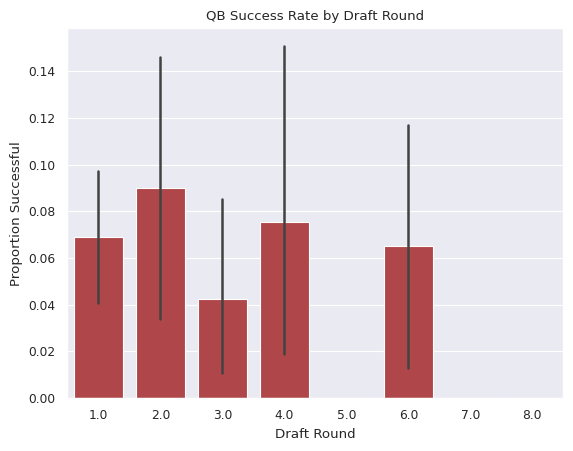

In [ ]:
sns.set_palette('RdBu')
sns.barplot(data=players_qb, x='draft_round', y='successful_qb')
plt.title('QB Success Rate by Draft Round')
plt.ylabel('Proportion Successful')
plt.xlabel('Draft Round')
plt.show()

In [ ]:
players_rb['successful_rb'] = (
    (players_rb['seasons_played'] >= 5) &
    (players_rb['career_rushing_yards'] >= 5000) &
    (players_rb['career_run_td'] >= 50)
).astype(int)

<ipython-input-122-43e3a5860f2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_rb['successful_rb'] = (


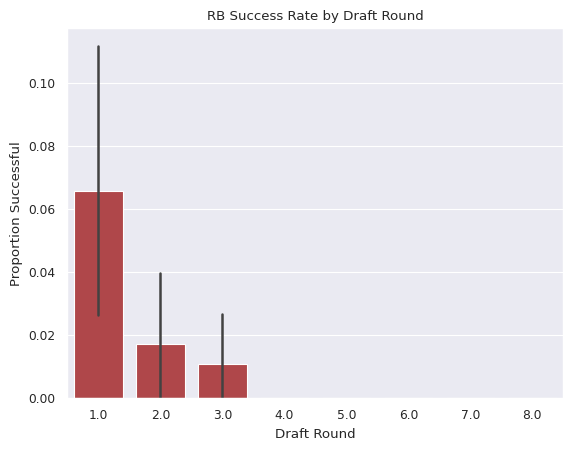

In [ ]:
sns.barplot(data=players_rb, x='draft_round', y='successful_rb')
plt.title('RB Success Rate by Draft Round')
plt.ylabel('Proportion Successful')
plt.xlabel('Draft Round')
plt.show()

In [ ]:
players_wr['successful_wr'] = (
    (players_wr['seasons_played'] >= 6) &
    (players_wr['career_receiving_yards'] >= 7500) &
    (players_wr['career_reception_td'] >= 45) &
    (players_wr['career_receptions'] >= 600)
).astype(int)

<ipython-input-124-39b7234a8d90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_wr['successful_wr'] = (


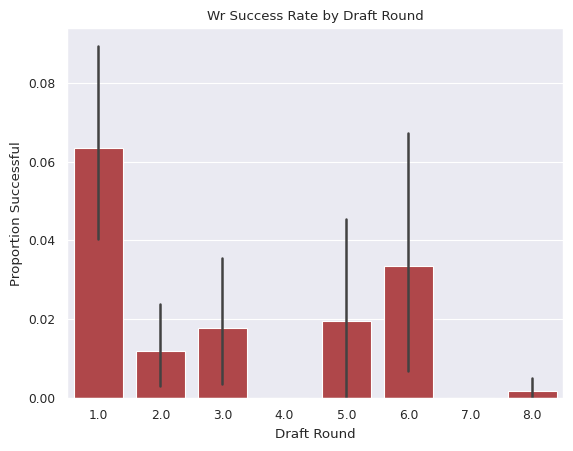

In [ ]:
sns.barplot(data=players_wr, x='draft_round', y='successful_wr')
plt.title('Wr Success Rate by Draft Round')
plt.ylabel('Proportion Successful')
plt.xlabel('Draft Round')
plt.show()

<ipython-input-126-01f22fc72831>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=players_qb, x='draft_round', y='successful_qb', ax = ax[0], palette = palette)
<ipython-input-126-01f22fc72831>:3: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=players_qb, x='draft_round', y='successful_qb', ax = ax[0], palette = palette)
<ipython-input-126-01f22fc72831>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=players_rb, x='draft_round', y='successful_rb', ax = ax[1], palette = palette)
<ipython-input-126-01f22fc72831>:7: UserWarning: 
The palette list has fewer values (6) than needed (8) a

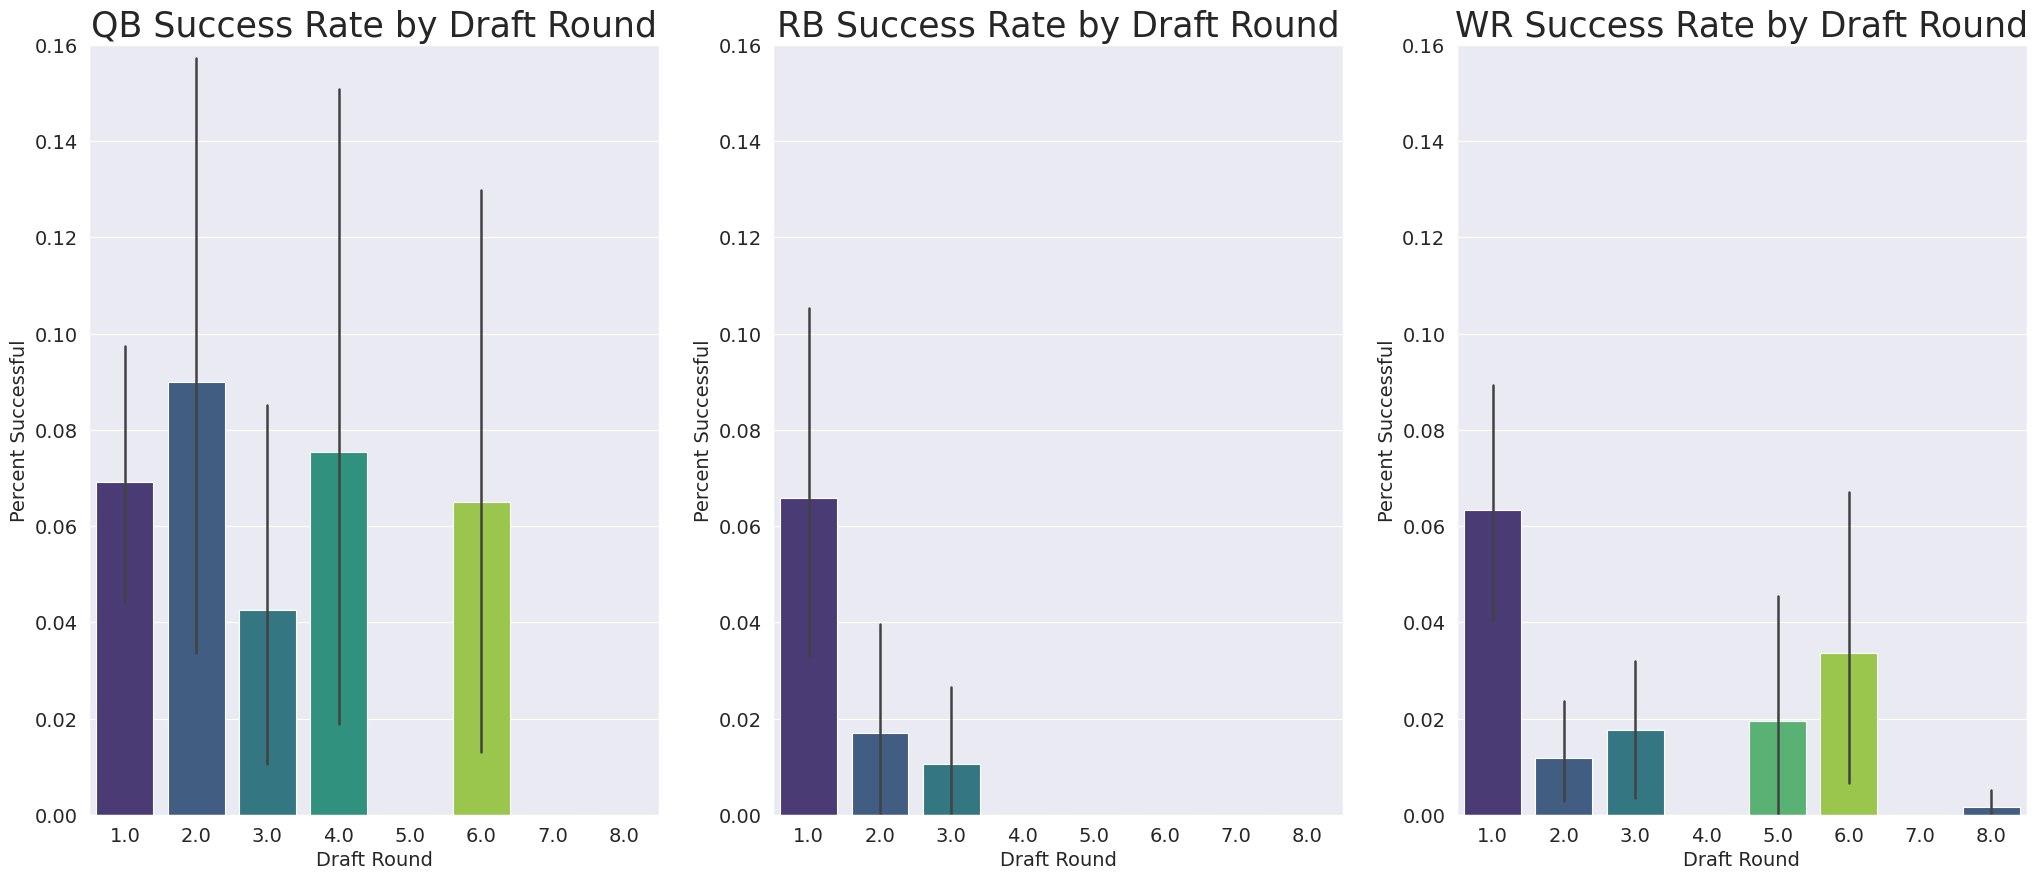

In [ ]:
fig, ax = plt.subplots(1,3, figsize= (25,10))
palette = sns.color_palette('viridis')
sns.barplot(data=players_qb, x='draft_round', y='successful_qb', ax = ax[0], palette = palette)
ax[0].set_title('QB Success Rate by Draft Round', fontsize = 25)
ax[0].set(ylabel = 'Percent Successful',
          xlabel = 'Draft Round')
sns.barplot(data=players_rb, x='draft_round', y='successful_rb', ax = ax[1], palette = palette)
ax[1].set_title('RB Success Rate by Draft Round', fontsize = 25)
ax[1].set(ylabel = 'Percent Successful',
          xlabel = 'Draft Round')
sns.barplot(data=players_wr, x='draft_round', y='successful_wr',ax = ax[2], palette = palette)
ax[2].set_title('WR Success Rate by Draft Round', fontsize = 25)
ax[2].set(ylabel = 'Percent Successful',
          xlabel = 'Draft Round')
ax[2].xaxis.label.set_size(14)
ax[2].yaxis.label.set_size(14)
ax[1].xaxis.label.set_size(14)
ax[1].yaxis.label.set_size(14)
ax[0].xaxis.label.set_size(14)
ax[0].yaxis.label.set_size(14)
ax[2].tick_params(axis='both', labelsize=14)
ax[1].tick_params(axis='both', labelsize=14)
ax[0].tick_params(axis='both', labelsize=14)
for axis in ax:
    axis.set_ylim(0, .16)
plt.show()

# How we defined success:

In [ ]:
players_qb['successful_qb'] = (
    (players_qb['seasons_played'] >= 8) &
    (players_qb['career_passing_yards'] >= 25000) &
    (players_qb['career_pass_td'] >= 200)
).astype(int)
players_rb['successful_rb'] = (
    (players_rb['seasons_played'] >= 5) &
    (players_rb['career_rushing_yards'] >= 5000) &
    (players_rb['career_run_td'] >= 50)
).astype(int)
players_wr['successful_wr'] = (
    (players_wr['seasons_played'] >= 6) &
    (players_wr['career_receiving_yards'] >= 7500) &
    (players_wr['career_reception_td'] >= 45) &
    (players_wr['career_receptions'] >= 600)
).astype(int)

<ipython-input-127-5c533cbcb4f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_qb['successful_qb'] = (
<ipython-input-127-5c533cbcb4f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_rb['successful_rb'] = (
<ipython-input-127-5c533cbcb4f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
spreads['home_team_won'] = spreads['score_home'] > spreads['score_away']

spreads['score_diff'] = spreads['score_home'] - spreads['score_away']
spreads.head(5)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,favorite_team_full,favorite_location,winner,favorite_won,home_team_won,score_diff
10542,9/5/2012,2012,1,False,New York Giants,17,24,Dallas Cowboys,New York Giants,-4.0,...,77.0,5.0,63.0,NaN,New York Giants,Home Favorite,Dallas Cowboys,False,False,-7
10543,9/9/2012,2012,1,False,Arizona Cardinals,20,16,Seattle Seahawks,Seattle Seahawks,-3.0,...,72.0,0.0,NaN,indoor,Seattle Seahawks,Away Favorite,Arizona Cardinals,False,True,4
10544,9/9/2012,2012,1,False,Chicago Bears,41,21,Indianapolis Colts,Chicago Bears,-10.0,...,70.0,11.0,66.0,NaN,Chicago Bears,Home Favorite,Chicago Bears,True,True,20
10545,9/9/2012,2012,1,False,Cleveland Browns,16,17,Philadelphia Eagles,Philadelphia Eagles,-9.5,...,68.0,9.0,57.0,NaN,Philadelphia Eagles,Away Favorite,Philadelphia Eagles,True,False,-1
10546,9/9/2012,2012,1,False,Denver Broncos,31,19,Pittsburgh Steelers,Denver Broncos,-2.0,...,85.0,9.0,12.0,NaN,Denver Broncos,Home Favorite,Denver Broncos,True,True,12


# Is home field advantage a real thing?

<ipython-input-132-e23deedce53a>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.displot(data = teams[['home_win_pct','away_win_pct']], palette= palette, kind = 'kde')
<ipython-input-132-e23deedce53a>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 21.44444444444447, 'Win Percentage')

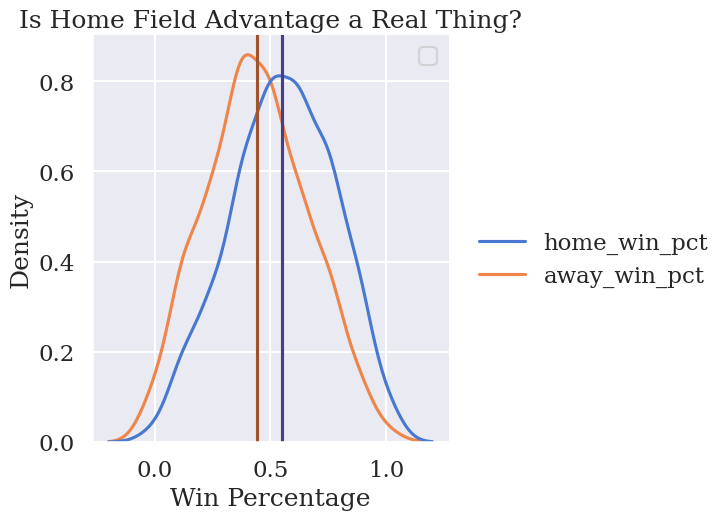

In [ ]:
palette = sns.color_palette('muted')
sns.set_theme(style= 'darkgrid', font='serif', context= 'talk')
sns.displot(data = teams[['home_win_pct','away_win_pct']], palette= palette, kind = 'kde')
plt.axvline(teams['home_win_pct'].mean(), color = 'darkslateblue')
plt.axvline(teams['away_win_pct'].mean(), color = 'sienna')
plt.legend()
plt.title('Is Home Field Advantage a Real Thing?')
plt.xlabel('Win Percentage')

<ipython-input-133-fb007662ff7f>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


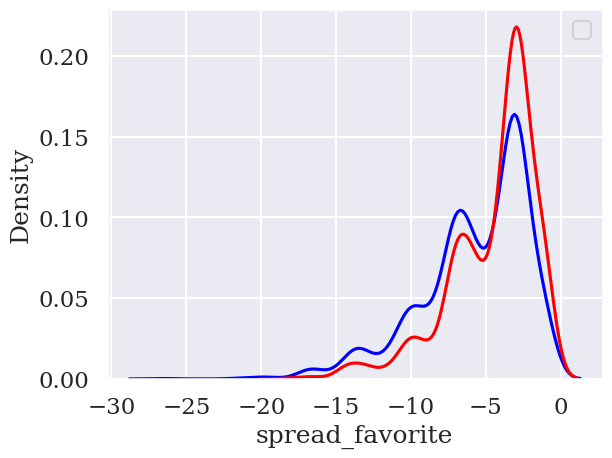

In [ ]:
sns.kdeplot(data= home_team_fav, x = 'spread_favorite', color = 'blue')
sns.kdeplot(data= away_team_fav, x = 'spread_favorite', color = 'red')
plt.legend()

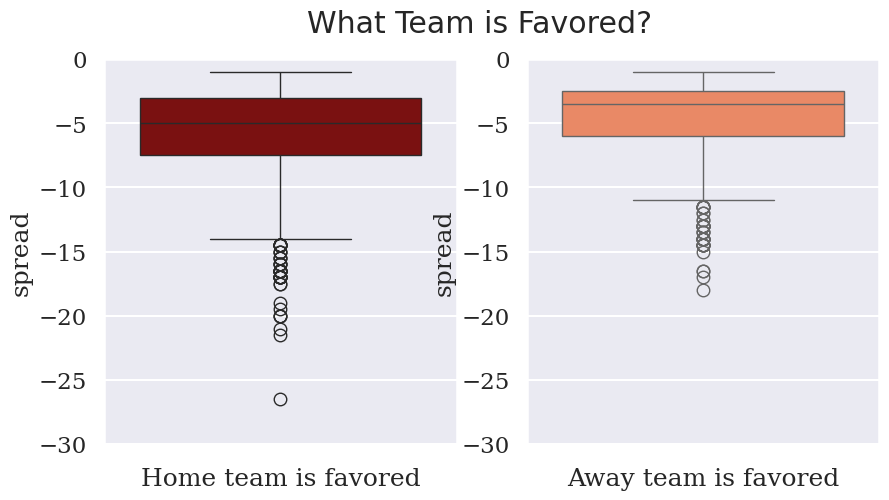

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.set_theme(style= 'darkgrid', context= 'talk')
sns.boxplot(data= home_team_fav, y = 'spread_favorite', color = 'darkred', ax = ax[0])
sns.boxplot(data= away_team_fav, y = 'spread_favorite', color = 'coral', ax = ax[1])
# plt.title("Home Team is Favored")
plt.suptitle("What Team is Favored?")
ax[0].set(ylabel = 'spread',
          xlabel= 'Home team is favored')
ax[1].set(ylabel = 'spread',
          xlabel='Away team is favored')
for axis in ax:
    axis.set_ylim(-30, 0)

# Are teams passing more over the years?

Text(0, 0.5, 'Avg Pass Attempts(Season)')

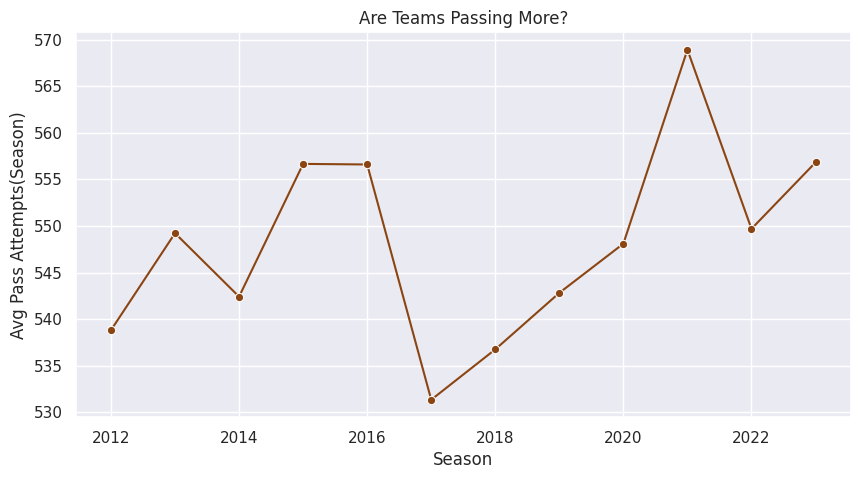

In [ ]:
season_pass_trends = teams.groupby('season')['pass_attempts'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.set_theme(style = 'darkgrid')
sns.lineplot(data = season_pass_trends, x= 'season', y= 'pass_attempts', marker = 'o', color = 'saddlebrown')
plt.title('Are Teams Passing More?')
plt.xlabel('Season')
plt.ylabel('Avg Pass Attempts(Season)')

# Are teams rushing more over the years?

Text(0, 0.5, 'Avg Rush Attempts(Season)')

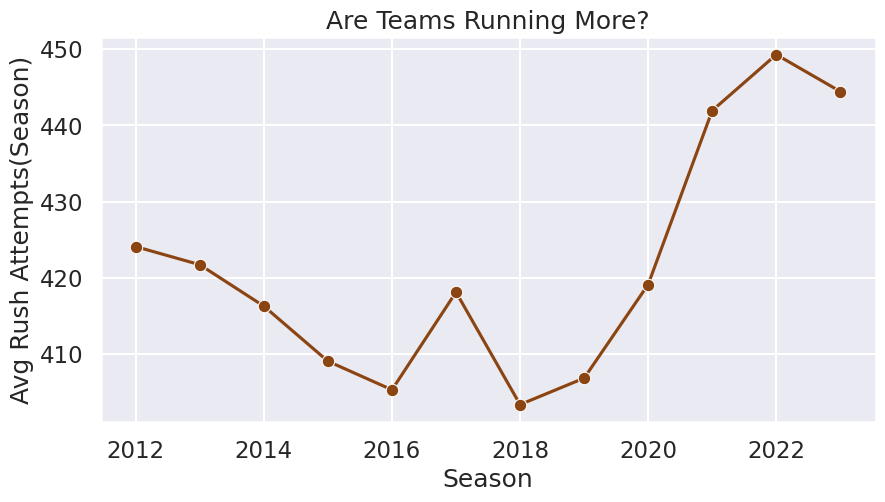

In [ ]:
season_rush_trends = teams.groupby('season')['rush_snaps_count'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.set_theme(style = 'darkgrid', context= 'talk')
sns.lineplot(data = season_rush_trends, x= 'season', y= 'rush_snaps_count', marker = 'o', color = 'saddlebrown')
plt.title('Are Teams Running More?')
plt.xlabel('Season')
plt.ylabel('Avg Rush Attempts(Season)')

In [ ]:
import pandas as pd


spread_data = pd.read_csv("spreadspoke_scores.csv")
team_data = pd.read_csv("yearly_team_data.csv")
def normalize_team_name(name):
    return name.strip().upper().replace(" ", "").replace("-", "")

team_name_map = {
    'ARIZONACARDINALS': 'ARI', 'ATLANTAFALCONS': 'ATL', 'BALTIMORERAVENS': 'BAL', 'BUFFALOBILLS': 'BUF',
    'CAROLINAPANTHERS': 'CAR', 'CHICAGOBEARS': 'CHI', 'CINCINNATIBENGALS': 'CIN', 'CLEVELANDBROWNS': 'CLE',
    'DALLASCOWBOYS': 'DAL', 'DENVERBRONCOS': 'DEN', 'DETROITLIONS': 'DET', 'GREENBAYPACKERS': 'GB',
    'HOUSTONTEXANS': 'HOU', 'INDIANAPOLISCOLTS': 'IND', 'JACKSONVILLEJAGUARS': 'JAX', 'KANSASCITYCHIEFS': 'KC',
    'LASVEGASRAIDERS': 'LV', 'LOSANGELESCHARGERS': 'LAC', 'LOSANGELESRAMS': 'LA', 'MIAMIDOLPHINS': 'MIA',
    'MINNESOTAVIKINGS': 'MIN', 'NEWENGLANDPATRIOTS': 'NE', 'NEWORLEANSSAINTS': 'NO', 'NEWYORKGIANTS': 'NYG',
    'NEWYORKJETS': 'NYJ', 'OAKLANDRAIDERS': 'LV', 'PHILADELPHIAEAGLES': 'PHI', 'PITTSBURGHSTEELERS': 'PIT',
    'SANDIEGOCHARGERS': 'LAC', 'SANFRANCISCO49ERS': 'SF', 'SEATTLESEAHAWKS': 'SEA', 'ST.LOUISRAMS': 'LA',
    'TAMPABAYBUCCANEERS': 'TB', 'TENNESSEETITANS': 'TEN', 'WASHINGTONREDSKINS': 'WAS', 'WASHINGTONFOOTBALLTEAM': 'WAS'
}

spread = spread_data.copy()
spread = spread[spread['schedule_season'].between(2012, 2023)]
spread['team_home_norm'] = spread['team_home'].apply(normalize_team_name)
spread['team_away_norm'] = spread['team_away'].apply(normalize_team_name)
spread['team_home_code'] = spread['team_home_norm'].map(team_name_map)
spread['team_away_code'] = spread['team_away_norm'].map(team_name_map)
spread['cover_spread'] = (spread['score_home'] - spread['score_away'] - spread['spread_favorite']) > 0
spread['is_home_favorite'] = (spread['team_home_code'] == spread['team_favorite_id']).astype(int)
team = team_data.copy()
team = team[team['season'].between(2013, 2023)]
team['team_norm'] = team['team'].apply(normalize_team_name)
merged = pd.merge(
    spread,
    team,
    how='left',
    left_on=['team_home_code', 'schedule_season'],
    right_on=['team', 'season']
)
opp_stats = team.rename(columns={
    'team': 'opp_team_code',
    'season': 'opp_season',
    'win_pct': 'opp_win_pct',
    'pass_attempts': 'opp_pass_attempts',
    'passing_yards': 'opp_passing_yards',
    'interception': 'opp_interception',
    'rush_snaps_count': 'opp_rush_snaps_count',
    'rushing_yards': 'opp_rushing_yards',
    'fumble_lost': 'opp_fumble_lost'
})

merged_with_opp = pd.merge(
    merged,
    opp_stats,
    how='left',
    left_on=['team_away_code', 'schedule_season'],
    right_on=['opp_team_code', 'opp_season']
)
print("✅ `merged_with_opp` is ready with", merged_with_opp.shape[0], "rows.")
# mess with years for better understanding

✅ `merged_with_opp` is ready with 3259 rows.


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.31      0.40       197
           1       0.72      0.87      0.78       395

    accuracy                           0.68       592
   macro avg       0.63      0.59      0.59       592
weighted avg       0.66      0.68      0.66       592

Confusion Matrix:
 [[ 62 135]
 [ 53 342]]
Logging Summary
------------------------------
Dataset shape used: (2958, 14)
Number of test samples: 592
Total correct predictions: 404
Total incorrect predictions: 188
Accuracy: 0.6824


<ipython-input-137-1498b6ee9824>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df_ctx, palette=colors)


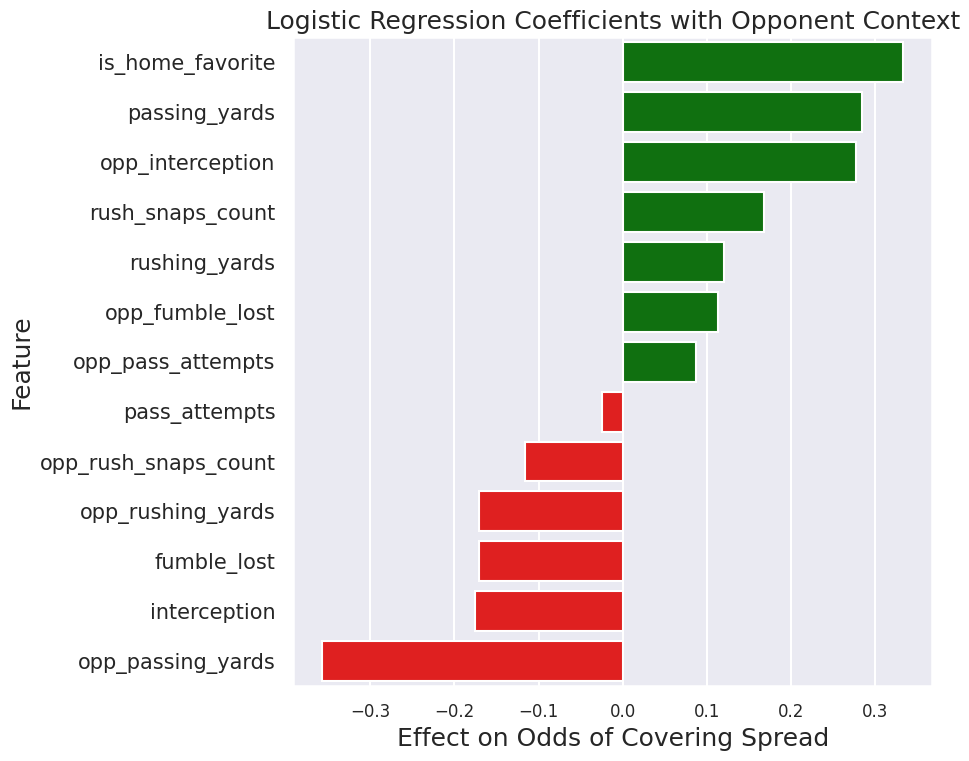

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
merged_with_opp['spread'] = merged_with_opp['spread_favorite']


context_features = [
    'cover_spread', 'pass_attempts', 'passing_yards', 'interception',
    'rush_snaps_count', 'rushing_yards', 'fumble_lost', 'opp_pass_attempts', 'opp_passing_yards', 'opp_interception',
    'opp_rush_snaps_count', 'opp_rushing_yards', 'opp_fumble_lost', 'is_home_favorite'
]

model_context = merged_with_opp[context_features].dropna()
X_ctx = model_context.drop(columns=['cover_spread'])
y_ctx = model_context['cover_spread'].astype(int)
scaler = StandardScaler()
X_ctx_scaled = scaler.fit_transform(X_ctx)
X_train_ctx, X_test_ctx, y_train_ctx, y_test_ctx = train_test_split(
    X_ctx_scaled, y_ctx, test_size=0.2, random_state=42
)
logreg_ctx = LogisticRegression(max_iter=1000, random_state=42)
logreg_ctx.fit(X_train_ctx, y_train_ctx)
y_pred_ctx = logreg_ctx.predict(X_test_ctx)
print("Classification Report:\n", classification_report(y_test_ctx, y_pred_ctx))
print("Confusion Matrix:\n", confusion_matrix(y_test_ctx, y_pred_ctx))
print("Logging Summary")
print("-" * 30)
print("Dataset shape used:", model_context.shape)
print("Number of test samples:", len(y_test_ctx))
print("Total correct predictions:", (y_pred_ctx == y_test_ctx).sum())
print("Total incorrect predictions:", (y_pred_ctx != y_test_ctx).sum())
print("Accuracy:", round((y_pred_ctx == y_test_ctx).mean(), 4))


coef_df_ctx = pd.DataFrame({
    'Feature': X_ctx.columns,
    'Coefficient': logreg_ctx.coef_[0]
}).sort_values(by='Coefficient', ascending=False)


coef_df_ctx.to_csv("logreg_coefficients_snapshot.csv", index=False)
# green helps cover red doesnt
colors = coef_df_ctx['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red').tolist()
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_ctx, palette=colors)
plt.title("Logistic Regression Coefficients with Opponent Context")
plt.xlabel("Effect on Odds of Covering Spread")
plt.ylabel("Feature")
plt.tight_layout()
plt.tick_params(axis = 'y', labelsize = 15)
plt.tick_params(axis = 'x', labelsize = 12)
plt.show()

#0 didnt cover spread
#1 cover spread
#2010-2020
#2012-2022
#2013-2023

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test_ctx, y_pred_ctx))


Accuracy: 0.6824324324324325


In [ ]:
print("X_test_ctx shape:", X_test_ctx.shape)
print("Number of predictions:", len(y_pred_ctx))


X_test_ctx shape: (592, 13)
Number of predictions: 592


In [ ]:
print("Dataset shape used:", model_context.shape)



Dataset shape used: (2958, 14)


In [ ]:
print("Dataset size used:", model_context.shape)
print("Total predictions made:", len(y_pred_ctx))
print("Total correct:", (y_pred_ctx == y_test_ctx).sum())
print("Total incorrect:", (y_pred_ctx != y_test_ctx).sum())


Dataset size used: (2958, 14)
Total predictions made: 592
Total correct: 404
Total incorrect: 188


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['team_home', 'team_away', 'team_favorite_id', 'favorite_location', 'winner']:
  spreads[col] = le.fit_transform(spreads[col])

